### su dung tenser de luu thong tin 

3D tensor (height, width, color_depth) 
4D tensor (frames, height, width, color_depth)
5D tensor (samples, frames, height, width, color_depth)

example: 144x256 youtube video clop sampled at 4 frames per second would 
    have 240 frames. 
    tensor of shape = (4, 240, 144, 256, 3)

### keras.layer.Dense (512, activation = 'relu')

specifically the function is as follows (where W is 2D tenser and b is a vector, both 
                                        attributes of the layer):
    output = relu(dot(W, input) + b)
with np.dot() la phep nhan 2 matrix 

### Element-wise operations la phep lay 2 matrix same size cong voi nhau 
voi a[i,j] + b[i,j] = c[i,j]

In [5]:
import sys
import os
import cv2
import numpy as np
import copy
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import keras
import tensorflow as tf
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import backend as K
from keras.optimizers import adam 

from keras.models import Sequential
from keras.models import Model, load_model


from keras import models
from keras import optimizers
from keras import callbacks
from keras import losses
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Activation, Dense
from keras import optimizers 


from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# from tensorflow.keras.models import BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D,ZeroPadding2D
from keras.optimizers import SGD

from keras.layers  import BatchNormalization

from sklearn.decomposition import PCA
from keras.datasets import mnist
from keras.utils import np_utils

In [12]:
network = models.Sequential ()
network.add(layers.Dense(512, activation = 'relu' , input = (28,28)))
network.add(layers.Dense(10, activation = 'softmax')) 

Now you understand that this network consists of a chain of two Dense layers, that
each layer applies a few simple tensor operations to the input data, and that these
operations involve weight tensors. Weight tensors, which are attributes of the layers,
are where the knowledge of the network persists.

### This was the network-compilation step:

In [ ]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### Now you understand that categorical_crossentropy is the loss function that’s used
as a feedback signal for learning the weight tensors, and which the training phase will
attempt to minimize. You also know that this reduction of the loss happens via mini-
batch stochastic gradient descent. The exact rules governing a specific use of gradient
descent are defined by the rmsprop optimizer passed as the first argument.
Finally, this was the training loop:


In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

As you saw in the previous chapters, training a neural network revolves around the fol-
lowing objects:

Layers, which are combined into a network (or model)

The input data and corresponding targets

The loss function, which defines the feedback signal used for learning

The optimizer, which determines how learning proceeds

You can visualize their interaction as illustrated in figure 3.1: the network, composed
of layers that are chained together, maps the input data to predictions. The loss func-
tion then compares these predictions to the targets, producing a loss value: a measure
of how well the network’s predictions match what was expected. The optimizer uses
this loss value to update the network’s weights.


### Classifying movie reviews a binary classification example 

In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [10]:
len(train_data[0])

218

In [11]:
train_labels[0]

1

In [12]:
max([max(sequence) for sequence in train_data] ) 

9999

In [13]:
word_index = imdb.get_word_index()
# word_index is a dictionary mapping
# words to an integer index.


reverse_word_index = dict(
                        [(value, key) for (key, value) in word_index.items()])
# Reverses it, mapping
# integer indices to words

decoded_review = ' '.join(
                        [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Decodes the review. Note that the indices
# are offset by 3 because 0, 1, and 2 are
# reserved indices for “padding,” “start of
# sequence,” and “unknown.”

1646592/1641221 [==============================] - 4s 2us/step


### Encoding the integer sequences into a binary matrix

### Classifying newswires: a multiclass classification example 

In [14]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1.   
#         am chi? lay dong nao va lay tu dau den dau?
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(train_data[0])  # print the first review
[1, 14, 22, 16, 43, 530, 973, ..., 5345, 19, 178, 32]

So on a smaller scale if:

word      word_id
I      -> 0
you    -> 1
he     -> 2
be     -> 3
eat    -> 4
happy  -> 5
sad    -> 6
banana -> 7
a      -> 8

the sentences would then be processed in a following way.

I be happy      -> [0,3,5]   -> [1,0,0,1,0,1,0,0,0]
I eat a banana. -> [0,4,8,7] -> [1,0,0,0,1,0,0,1,1]

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# you should also vectorize you labels, which is straightforward: 

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
from keras import models 
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu' , input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid' ))


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### What are activation functions, and why are they necessary?
Without an activation function like relu (also called a non-linearity), the Dense layer
would consist of two linear operations—a dot product and an addition:

output = dot(W, input) + b

So the layer could only learn linear transformations (affine transformations) of the
input data: the hypothesis space of the layer would be the set of all possible linear
transformations of the input data into a 16-dimensional space. Such a hypothesis
space is too restricted and wouldn’t benefit from multiple layers of representations,
because a deep stack of linear layers would still implement a linear operation: adding
more layers wouldn’t extend the hypothesis space.

In order to get access to a much richer hypothesis space that would benefit from
deep representations, you need a non-linearity, or activation function. relu is the
most popular activation function in deep learning, but there are many other candi-
dates, which all come with similarly strange names: prelu, elu, and so on.

 Ý nói ở đây ko có rule activate function thì model network chỉ học được như một đường linearity . 
điều đó ko thể học deep hơn trong mạng . 

### Compiling the model 

In [19]:

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', 
             metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Configuring the optimizer

In [21]:
from keras import optimizers 
model.compile (optimizer = optimizers.RMSprop (lr = 0.001), 
              loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

### Using custom losses and metrics

In [ ]:
from keras import losses 
from keras import metrics 

model.compile(optimizer = optimizers.RMSprop (lr = 0.001), 
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

## Validating your approach

### Setting aside a validation 

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:] 
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model

In [25]:
model.compile( optimizer = 'rmsprop',
             loss = 'binary_crossentropy', 
             metrics = ['acc'])

history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs = 20, 
                   batch_size = 512, 
                   validation_data = (x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.5035 - acc: 0.7827 - val_loss: 0.3769 - val_acc: 0.8716
Epoch 2/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.2978 - acc: 0.9046 - val_loss: 0.3159 - val_acc: 0.8820
Epoch 3/20
15000/15000 [==============================] - 1s 56us/step - loss: 0.2215 - acc: 0.9302 - val_loss: 0.3023 - val_acc: 0.8816
Epoch 4/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.1726 - acc: 0.9447 - val_loss: 0.2978 - val_acc: 0.8823
Epoch 5/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.1408 - acc: 0.9549 - val_loss: 0.3123 - val_acc: 0.8785
Epoch 6/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.1127 - acc: 0.9659 - val_loss: 0.3264 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.0913 - acc: 0.9743 - val_loss: 0.3203 - val_ac

###  Key of in History model 

In [34]:
history_dict = history.history 
history_dict.keys()
# [u 'acc', u'loss', u'val_acc', u'val_loss']

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [36]:
acc = history_dict['acc']
acc

[0.7826667,
 0.9046,
 0.9302,
 0.9446667,
 0.95493335,
 0.9658667,
 0.97433335,
 0.98073334,
 0.9828,
 0.9870667,
 0.99186665,
 0.99126667,
 0.99653333,
 0.99626666,
 0.99813336,
 0.9968,
 0.9996667,
 0.99813336,
 0.99986666,
 0.9993333]

In [40]:
val_acc = history_dict['val_acc']
val_acc

[0.8715999722480774,
 0.8820000290870667,
 0.881600022315979,
 0.8823000192642212,
 0.8784999847412109,
 0.8772000074386597,
 0.8831999897956848,
 0.8772000074386597,
 0.8762999773025513,
 0.8784000277519226,
 0.8758000135421753,
 0.8755999803543091,
 0.868399977684021,
 0.8736000061035156,
 0.8695999979972839,
 0.8704000115394592,
 0.8683000206947327,
 0.8677999973297119,
 0.8673999905586243,
 0.8658000230789185]

### Plotting the trainning and validation loss 

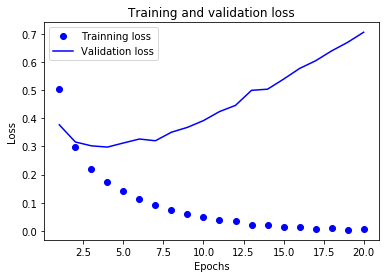

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history 

loss_values = history_dict['loss']

val_loss_values = history_dict ['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot (epochs, loss_values , 'bo', label = 'Trainning loss') 
# "bo" is for blue dot."
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
# b is for solid blue line
plt.title ('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###  Plotting the trainning and validation accuracy 

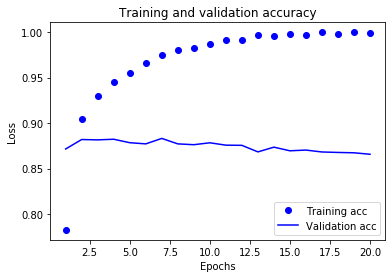

In [41]:
plt.clf()
# Clears the figure

acc_values = history_dict['acc'] 

val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch 

In [42]:
model = models.Sequential()


model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
#the final results are as follows: 

results = model.evaluate(x_test, y_test)



Epoch 1/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.4729 - accuracy: 0.8175
Epoch 2/4
25000/25000 [==============================] - 1s 41us/step - loss: 0.2707 - accuracy: 0.9092
Epoch 3/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.2044 - accuracy: 0.9283
Epoch 4/4
25000/25000 [==============================] - 1s 53us/step


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### generate predictions on new data 

In [44]:
model.predict (x_test)

array([[0.19642329],
       [0.9999913 ],
       [0.94620985],
       ...,
       [0.15853694],
       [0.10188991],
       [0.6351508 ]], dtype=float32)

## Classifying newswires a multiclass classification example 

In [45]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 9s 4us/step


In [46]:
print(len(train_data)),print(len(test_data))

8982
2246


(None, None)

### Decoding newswires back to text

In [47]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]])

557056/550378 [==============================] - 2s 3us/step


### Pewparing the data 

In [49]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Vectorized training data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [50]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [51]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [53]:
one_hot_test_labels.shape

(2246, 46)

In [55]:
train_labels.shape

(8982,)

### Retraining a model from scratch

In [56]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer = 'rmsprop', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [82]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [89]:
History = model.fit( partial_x_train, 
                     partial_y_train, 
                     epochs = 20, 
                     batch_size = 512, 
                     validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.0759 - accuracy: 0.9573 - val_loss: 1.5236 - val_accuracy: 0.7760
Epoch 2/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.0770 - accuracy: 0.9572 - val_loss: 1.5131 - val_accuracy: 0.7760
Epoch 3/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.0761 - accuracy: 0.9580 - val_loss: 1.4772 - val_accuracy: 0.7820
Epoch 4/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.0758 - accuracy: 0.9577 - val_loss: 1.5118 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.0731 - accuracy: 0.9590 - val_loss: 1.5255 - val_accuracy: 0.7670
Epoch 6/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.0742 - accuracy: 0.9595 - val_loss: 1.5267 - val_accuracy: 0.7820
Epoch 7/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.073

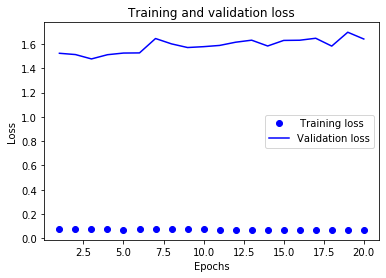

In [90]:
import matplotlib.pyplot as plt 


loss = History.history['loss']
val_loss = History.history ['val_loss']

epochs = range(1 , len(loss) + 1) 
plt.plot(epochs, loss, 'bo' , label = ' Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [91]:
History.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

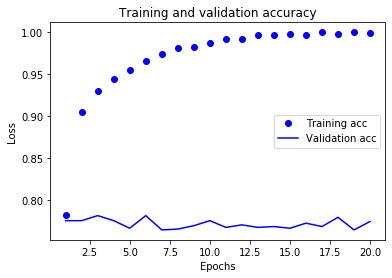

In [92]:
plt.clf()  # Clears th figure lam sach lai cai figure



val_acc = History.history['val_accuracy']

plt.plot(epochs, acc , 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b' , label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Retraining a model from scratch 

In [96]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
H =  model.fit(partial_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 69us/step - loss: 2.5239 - accuracy: 0.5284 - val_loss: 1.6624 - val_accuracy: 0.6570
Epoch 2/9
7982/7982 [==============================] - 0s 52us/step - loss: 1.3888 - accuracy: 0.7060 - val_loss: 1.3002 - val_accuracy: 0.7190
Epoch 3/9
7982/7982 [=====================

In [94]:
results 

[0.9850347322326416, 0.7916295528411865]

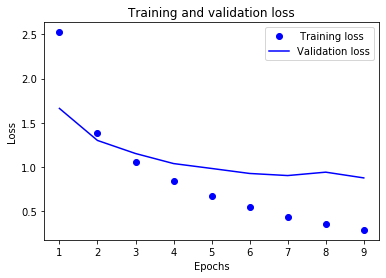

In [97]:
import matplotlib.pyplot as plt 


loss = H.history['loss']
val_loss = H.history ['val_loss']

epochs = range(1 , len(loss) + 1) 
plt.plot(epochs, loss, 'bo' , label = ' Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [99]:
import copy 
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float (np.sum(hits_array))  / len(test_labels)

0.188780053428317

### Generating perdictions on new data  Tạo dự đoán về dữ liệu mới

In [101]:
predictions = model.predict (x_test)
predictions[0].shape

(46,)

In [103]:
predictions.shape

(2246, 46)

In [104]:
np.sum(predictions[0]) # softmax 

1.0

In [105]:
np.argmax(predictions[0])  # index max cua thang predictions [0]

3

### A different way to hadle the labels and the loss 

In [106]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

## The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional: for example, 4-dimensional



sự quan trọng có thêm layer deep learning 

### A model with an information bottleneck

In [107]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 105us/step - loss: 3.0511 - accuracy: 0.3016 - val_loss: 2.4027 - val_accuracy: 0.3960
Epoch 2/20
7982/7982 [==============================] - 1s 84us/step - loss: 2.0806 - accuracy: 0.4163 - val_loss: 1.8215 - val_accuracy: 0.5050
Epoch 3/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.5260 - accuracy: 0.6181 - val_loss: 1.4852 - val_accuracy: 0.6150
Epoch 4/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.2527 - accuracy: 0.6750 - val_loss: 1.3731 - val_accuracy: 0.6760
Epoch 5/20
7982/7982 [==============================] - 1s 87us/step - loss: 1.0941 - accuracy: 0.7240 - val_loss: 1.3537 - val_accuracy: 0.6760
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.9857 - accuracy: 0.7353 - val_loss: 1.2973 - val_accuracy: 0.6870
Epoch 7/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.90

In [108]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_18 (Dense)             (None, 46)                230       
Total params: 640,554
Trainable params: 640,554
Non-trainable params: 0
_________________________________________________________________


### Wrapping up
Here’s what you should take away from this example:

+ If you’re trying to classify data points among N classes, your  network should end with a Dense layer of size N .

+ In a single-label, multiclass classification problem, your network should end
with a softmax activation so that it will output a probability distribution over the
N output classes.

+ Categorical crossentropy is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions
output by the network and the true distribution of the targets.

+ There are two ways to handle labels in multiclass classification:

– Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function

– Encoding the labels as integers and using the sparse_categorical_crossentropy
loss function

+ If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers
that are too small.

### Cac loai metric co the co 

In [ ]:

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# prepare sequence
X = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# create model
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
# train model
history = model.fit(X, X, epochs=500, batch_size=len(X), verbose=2)
# plot metrics
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

## Predicting house prices: a regression example

### Loading the Boston housing dataset

In [109]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [113]:
print(train_data.shape),print(test_data.shape)

(404, 13)
(102, 13)


(None, None)

### Preparing the data 

 Normalizing the data 

In [114]:
mean = train_data.mean(axis=0)

train_data -= mean

std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

### Building your network 

In [120]:
from keras import models
from keras import layers

# Because you’ll need to instantiate
# the same model multiple times, you
# use a function to construct it.

def build_model():
    model = models.Sequential() # axplantation
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [124]:
model = build_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Validating your approah using K-fold validation 

### To evaluate your network while you keep adjusting its parameters
(such as the number of epochs used for training), you could split the data into a training set and a valida-
tion set, as you did in the previous examples. But because you have so few data points,
the validation set would end up being very small (for instance, about 100 examples).
As a consequence, the validation scores might change a lot depending on which data
points you chose to use for validation and which you chose for training: the validation
scores might have a high variance with regard to the validation split. This would pre-
vent you from reliably evaluating your model.

The best practice in such situations is to use K -fold cross-validation (see figure 3.11).
It consists of splitting the available data into K partitions (typically K = 4 or 5), instanti-
ating K identical models, and training each one on K – 1 partitions while evaluating on
the remaining partition. The validation score for the model used is then the average of
the K validation scores obtained. In terms of code, this is straightforward

## K-fold validation 
Xây dựng data K fold với tep validation 


In [132]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [134]:
for i in range (k): 
    print ('processing fold #', i)
    val_data = train_data [i* num_val_sample : (i+1) * num_val_sample]
#     Prepares the validatation data : data from partition #k  
    val_targets = train_targets [i * num_val_sample: (i+1) * num_val_sample]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                    train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                    train_targets[(i + 1) * num_val_samples:]],
                                    axis=0)
    
    model = build_model()        # Builds the keras model (already compiled)
    
    
    model.fit( partial_train_data, partial_train_targets,  # Trains the model (in silent mode, verbose = 0)
                 epochs = num_epochs, batch_size = 1, verbose = 0) 
    val_mse, val_mae = model.evaluate (val_data, val_targets, verbose = 0) # Evaluates the model on the validation data 
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


### Running this with num_epochs = 100 yields the following results:

all_scores

[2.588258957792037, 3.1289568449719116, 3.1856116051248984, 3.0763342615401386]

np.mean(all_scores)
2.9947904173572462

The different runs do indeed show rather different validation scores, from 2.6 to 3.2.
The average (3.0) is a much more reliable metric than any single score—that’s the
entire point of K-fold cross-validation. In this case, you’re off 

by $3,000 on average,
which is significant considering that the prices range from $10,000 to $50,000.
Let’s try training the network a bit longer: 500 epochs. To keep a record of how
well the model does at each epoch, you’ll modify the training loop to save the per-
epoch validation score log.

In [135]:
print(all_scores)
print(np.mean(all_scores))

[2.0489659309387207, 2.7770612239837646, 2.6849069595336914, 2.524324655532837]
2.5088146924972534


### Saving the validation logs at each fold 
Cách truyền vao hàm fit với K fold mean

In [137]:
from keras import models
from keras import layers

# Because you’ll need to instantiate
# the same model multiple times, you
# use a function to construct it.

def build_model__():
    model = models.Sequential() # axplantation
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=['mean_absolute_error'])
    return model


num_epochs = 500

# Prepares the validation data:
all_mae_histories = []
# data from partition #k
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
# Licensed to <null>
# Prepares the training
# data: data from all
# other partitions89
# Predicting house prices: a regression example

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
        # Builds the Keras model
        # (already compiled)
        
    model = build_model__()
    
    history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
       
        
#     You can then compute the average of the per-epoch MAE scores for all folds.

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


### Building the history of successive mean K-fold validation scores 

In [138]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    
# #     Let’s plot this; see figure 3.12.

### Plotting valudation scores 

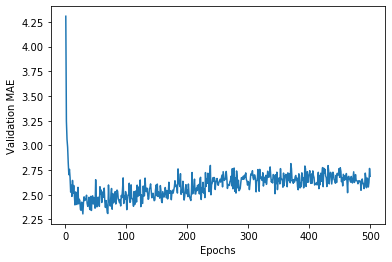

In [139]:
import matplotlib.pyplot as plt


plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

plt.xlabel('Epochs')

plt.ylabel('Validation MAE')

plt.show()

### Plotting validation scores, excluding the first 10 data points

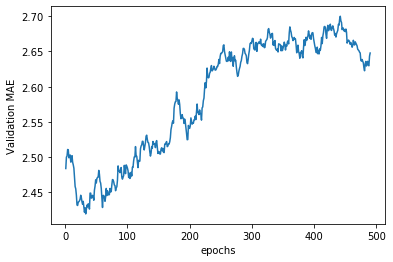

In [151]:
def smooth_curve (points, factor = 0.9): 
    smoothed_point = []
    for point in points: 
        if smoothed_point: 
            previous = smoothed_point[-1]
            smoothed_point.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_point.append(point)
    return smoothed_point
  

smooth_mae_history = smooth_curve(average_mae_history[10:])

# print(smooth_mae_history)
# plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel ('epochs')
plt.ylabel ('Validation MAE')
plt.show()

### Training the final model 

In [152]:
model = build_model() 

model.fit(train_data, train_targets, 
         epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, testmae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 887us/step


In [155]:
testmae_score

2.6724250316619873

### Wrapping up

+ Regression is done using different loss functions than what we used for classification. Mean squared error ( MSE ) is a loss function commonly used for regression.

+ Hồi quy được thực hiện bằng cách sử dụng các hàm mất khác nhau so với những gì chúng ta đã sử dụng để phân loại. Lỗi bình phương trung bình (MSE) là một hàm mất thường được sử dụng để hồi quy.

+ Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error ( MAE ).


+ Tương tự, các số liệu đánh giá được sử dụng cho hồi quy khác với các số liệu được sử dụng để phân loại; một cách tự nhiên, khái niệm về độ chính xác không được áp dụng cho hồi quy. Một số liệu hồi quy phổ biến có nghĩa là lỗi tuyệt đối (MAE).

+ When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.When there is little data available, using K-fold validation is a great way to reliably evaluate a model.

+ Khi các tính năng trong dữ liệu đầu vào có các giá trị trong các phạm vi khác nhau, mỗi tính năng nên được thu nhỏ độc lập như một bước tiền xử lý. Khi có ít dữ liệu, sử dụng xác thực K-Fold là một cách tuyệt vời để đánh giá mô hình một cách đáng tin cậy.

+ When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.

+ Khi có ít dữ liệu đào tạo, bạn nên sử dụng một mạng nhỏ với một vài lớp ẩn (thường chỉ có một hoặc hai), để tránh bị quá tải nghiêm trọng.


### Chaper summary 

+ You’re now able to handle the most common kinds of machine-learning tasks on vector data: binary classification, multiclass classification, and scalar regression. The “Wrapping up” sections earlier in the chapter summarize the important points you’ve learned regarding these types of tasks.

+ Bây giờ bạn có thể xử lý các loại tác vụ máy học phổ biến nhất trên dữ liệu vectơ: phân loại nhị phân, phân loại đa lớp và hồi quy vô hướng. Các phần kết thúc của phần trước trong chương này tóm tắt những điểm quan trọng mà bạn đã học được về các loại nhiệm vụ này.

+ You’ll usually need to preprocess raw data before feeding it into a neural network.


+ Bạn thường sẽ cần xử lý trước dữ liệu thô trước khi đưa dữ liệu vào mạng thần kinh.

+ When your data has features with different ranges, scale each feature independently as part of preprocessing.

+ Khi dữ liệu của bạn có các tính năng với các phạm vi khác nhau, hãy chia tỷ lệ từng tính năng một cách độc lập như một phần của quá trình tiền xử lý.

+ As training progresses, neural networks eventually begin to overfit and obtain worse results on never-before-seen data.


+ Khi quá trình đào tạo tiến triển, các mạng lưới thần kinh cuối cùng bắt đầu hoạt động quá mức và thu được kết quả tồi tệ hơn trên dữ liệu chưa từng thấy trước đây.

+ If you don’t have much training data, use a small network with only one or two hidden layers, to avoid severe overfitting.

+ Nếu bạn không có nhiều dữ liệu đào tạo, hãy sử dụng một mạng nhỏ chỉ có một hoặc hai lớp ẩn, để tránh bị quá tải nghiêm trọng.

+ If your data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small.


+ Nếu dữ liệu của bạn được chia thành nhiều loại, bạn có thể gây ra tắc nghẽn thông tin nếu bạn làm cho các lớp trung gian quá nhỏ.

+ Regression uses different loss functions and different evaluation metrics than classification.

+ Hồi quy sử dụng các hàm mất khác nhau và các số liệu đánh giá khác nhau so với phân loại.

+ When you’re working with little data, K-fold validation can help reliably evaluate your model.


+ Khi bạn làm việc với ít dữ liệu, xác thực K-Fold có thể giúp đánh giá mô hình của bạn một cách đáng tin cậy.

### Evaluating machinelearning model 

 Training, validation, and test sets

### SIMPLE HOLD - OUT VALIDATION

xao tron data rui chia theo ty le 80-20 or 70-30 

### Hold-out validation

In [163]:
num_validation_samples = 10000

data = train_data

np.random.shuffle(data)

validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training_data = data[:]

model = get_model()

model.train(training_data)

validation_score = model.evaluate(validation_data)
model = get_model()
model.train(np.concatenate([training_data,validation_data]))

test_score = model.evaluate(test_data)


### K-fold cross-validation

 chia lam k dataset sample (lay 1 trong so chung ra lam validation_dataset )

In [ ]:
k = 4

num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []

for fold in range(k):
    validation_data = data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
    
    training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold + 1):]
    
    model = get_model()
    
    model.train(training_data)
    
    validation_score = model.evaluate(validation_data)
    
    validation_scores.append(validation_score)
    validation_score = np.average(validation_scores)
    model = get_model()
    model.train(data)
    test_score = model.evaluate(test_data)

+ In all three examples in the previous chapter—predicting movie reviews, topic classification, and house-price regression the performance of the model on the held-out validation data always peaked after a few epochs and then began to degrade: the model quickly started to overfit to the training data. Overfitting happens in every machine-learning problem. Learning how to deal with overfitting is essential to mastering machine learning.

Trong cả ba ví dụ trong chương trước, dự đoán đánh giá phim, phân loại chủ đề và hồi quy giá nhà, hiệu suất của mô hình trên dữ liệu xác thực đã tổ chức luôn đạt đỉnh sau một vài kỷ nguyên và sau đó bắt đầu giảm
mô hình nhanh chóng bắt đầu phù hợp với dữ liệu đào tạo. Quá mức xảy ra trong mọi vấn đề máy học. Học cách đối phó với quá mức là điều cần thiết để thành thạo học máy.

The fundamental issue in machine learning is the tension between optimization and generalization. Optimization refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning), whereas generalization refers to how well the trained model performs on data it has never seen before. The goal of the game is to get good generalization, of course, but you don’t control generalization you can only adjust the model based on its training data.

Vấn đề cơ bản trong học máy là sự căng thẳng giữa tối ưu hóa và khái quát hóa. Tối ưu hóa đề cập đến quá trình điều chỉnh một mô hình để có hiệu suất tốt nhất có thể trên dữ liệu đào tạo (học trong học máy), trong khi khái quát hóa đề cập đến việc mô hình được đào tạo thực hiện tốt như thế nào trên dữ liệu mà nó chưa từng thấy trước đây. Mục tiêu của trò chơi là để có được sự khái quát hóa tốt, tất nhiên, nhưng bạn không nên khái quát hóa điều khiển, bạn chỉ có thể điều chỉnh mô hình dựa trên dữ liệu huấn luyện của nó.

At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be underfit: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. But after a certain number of
iterations on the training data, generalization stops improving, and validation metrics stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrele-
vant when it comes to new data.

Khi bắt đầu đào tạo, tối ưu hóa và khái quát hóa có mối tương quan với nhau: tổn thất về dữ liệu đào tạo càng thấp, tổn thất về dữ liệu kiểm tra càng thấp. Trong khi điều này đang xảy ra, mô hình của bạn được cho là không phù hợp: vẫn còn tiến triển cần thực hiện; mạng vẫn chưa mô hình hóa tất cả các mẫu có liên quan trong dữ liệu đào tạo. Nhưng sau một số lượng nhất định
lặp đi lặp lại trên dữ liệu đào tạo, việc khái quát hóa ngừng cải thiện và các số liệu xác nhận bị đình trệ và sau đó bắt đầu xuống cấp: mô hình đang bắt đầu phù hợp. Đó là, nó bắt đầu tìm hiểu các mẫu dành riêng cho dữ liệu đào tạo nhưng gây hiểu lầm hoặc không liên quan
vant khi nói đến dữ liệu mới.


To prevent a model from learning misleading or irrelevant patterns found in the training data, the best solution is to get more training data. A model trained on more data will naturally generalize better. When that isn’t possible, the next-best solution is to modulate the quantity of information that your model is allowed to store or to add
constraints on what information it’s allowed to store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well. The processing of fighting overfitting this way is called regularization. Let’s review
some of the most common regularization techniques and apply them in practice to improve the movie-classification model from section 


Để ngăn chặn một mô hình học các mẫu sai lệch hoặc không liên quan được tìm thấy trong dữ liệu đào tạo, giải pháp tốt nhất là lấy thêm dữ liệu đào tạo. Một mô hình được đào tạo trên nhiều dữ liệu sẽ tự nhiên khái quát tốt hơn. Khi điều đó có thể, giải pháp tốt nhất tiếp theo là điều chỉnh lượng thông tin mà mô hình của bạn được phép lưu trữ hoặc thêm
những hạn chế về thông tin mà nó cho phép lưu trữ. Nếu một mạng chỉ có thể đủ khả năng để ghi nhớ một số lượng nhỏ các mẫu, quá trình tối ưu hóa sẽ buộc nó phải tập trung vào các mẫu nổi bật nhất, có cơ hội khái quát tốt hơn. Việc xử lý chiến đấu quá mức theo cách này được gọi là chính quy. Hãy xem xét lại
một số kỹ thuật chính quy hóa phổ biến nhất và áp dụng chúng trong thực tế để cải thiện mô hình phân loại phim từ phần


### Overfitting and underfitting

 Original model (thay doi model )

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# giảm độ phức tạp của model (giảm tham số )
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Adding L2 weight regularization to the model (danh phat voi L1, L2 ) 
Adding weight regularization

In [ ]:
from keras import regularizers

model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                            activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                            activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# đây là cách thêm weight regularizers 

from keras import regularizers

model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))


In [ ]:
# đây là cách thêm weight regularizers 
from keras import regularizers
regularizers.l1(0.001)  #L1 regularization

regularizers.l1_l2(l1=0.001, l2=0.001)  # L2 regularization

### Adding dropout

Adding dropout to the IMDB network

In [ ]:
# co 2 cach dropout : cach 1 

layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
layer_output /= 0.5

In [ ]:
# cach 2 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

### có 4 cách giải quyết overfit là: 

+ Lấy thêm data

+ giam độ phức tạp của mạng (tham số ) 

+ thêm weight regularization 

+ bỏ đi nút đầu ra ( add dropout) 

### The universal workflow of machine learning 
quy trình làm việc của ML 

Defining the problem and assembling a dataset (định nghĩa vấn đề và xây dựng data)

Choosing a measure of success (chọn cách đo đạc tính toán model của mình)

Preparing your data (chuyển bị data) 

Developing a model that does better than a baseline (phát triển model tốt hơn cái ban đầu )



Choosing the right last-layer activation and loss function for your model:

    Problem type                                 Last-layer activation      Loss function


    Binary classification                        sigmoid                    binary_crossentropy
    Multiclass, single-label classification      softmax                    categorical_crossentropy
    Multiclass, multilabel classification        sigmoid                    binary_crossentropy

    Regression to arbitrary values               None                       mse
    Regression to values between 0 and 1         sigmoid                    mse or binary_crossentropy

Scaling up: developing a model that overfits (mở rông quy mô, phát triển model phức tạp hơn )

+ Add layers.
+ Make the layers bigger.
+ Train for more epochs.





### Deep learning in practice 

In [140]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.1813 - accuracy: 0.9426
Epoch 2/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.0474 - accuracy: 0.9853
Epoch 3/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.0326 - accuracy: 0.9897
Epoch 4/5
60000/60000 [==============================] - 15s 248us/step - loss: 0.0248 - accuracy: 0.9927
Epoch 5/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.0198 - accuracy: 0.9937


In [5]:
test_lost , test_acc = model.evaluate (test_images, test_labels)

print ( test_lost) , print (test_acc)

10000/10000 [==============================] - 1s 80us/step
0.03271491677864105
0.9908000230789185


(None, None)

### The convolution operation 

### Training a convnet from scratch on a small dataset 

+ nếu data nhỏ dùng Data Augmentation tăng accuracy 
+ dùng kỹ thuật feature extraction with a pretrained network 

### The relevance of deep learning for small data problems 


You’ll sometimes hear that deep learning only works when lots of data is available.
This is valid in part: one fundamental characteristic of deep learning is that it can find
interesting features in the training data on its own, without any need for manual fea-
ture engineering, and this can only be achieved when lots of training examples are
available. This is especially true for problems where the input samples are very high-
dimensional, like images.
But what constitutes lots of samples is relative—relative to the size and depth of the
network you’re trying to train, for starters. It isn’t possible to train a convnet to solve a
complex problem with just a few tens of samples, but a few hundred can potentially
suffice if the model is small and well regularized and the task is simple. Because conv-
nets learn local, translation-invariant features, they’re highly data efficient on percep-
tual problems. Training a convnet from scratch on a very small image dataset will still
yield reasonable results despite a relative lack of data, without the need for any custom
feature engineering. You’ll see this in action in this section.
What’s more, deep-learning models are by nature highly repurposable: you can
take, say, an image-classification or speech-to-text model trained on a large-scale dataset
and reuse it on a significantly different problem with only minor changes. Specifically,

in the case of computer vision, many pretrained models (usually trained on the Image-
Net dataset) are now publicly available for download and can be used to bootstrap pow-
erful vision models out of very little data. That’s what you’ll do in the next section. Let’s
start by getting your hands on the data.

In [142]:
cd dogs-vs-cats/

/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/dogs-vs-cats


In [144]:
ls 

sampleSubmission.csv  test1/  train/


In [ ]:
import os, shutil

original_dataset_dir = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python'
#  đường đẫn đến thư mục chứa dataset gốc có thể đc nén 

base_dir = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/dogs-vs-cats'
#  thư mục lưu trữ data nhỏ 


os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')

os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test1')
os.mkdir(test_dir)

#  gép các thư mục train , validation. test 

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#  thư mục dataset huấn luyện với ảnh mèo 
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
# thư mục dataset huấn luyện với ảnh chó 
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
# thư mục validation với ảnh mèo 

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir) 
# thư mục validation với ảnh chó 

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#  thư mục test với ảnh mèo 
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
# thư mục test với ảnh chó 

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
#  sao chép 1000 ảnh mèo đầu tiên đến train_cats_dỉ

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
#  sao chep tiếp theo 500 ảnh mèo đến test_cats_dir 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
#  sao chep 1000 ảnh chó đầu tiên đến train_dogs_dir 

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst) 
# Copies the next 500 dog images to validation_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
#  sao chep tiếp 500 ảnh chó đến test_dogs_dir

### buid mạng network

In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### Configuring the model for training 

In [9]:
from keras import optimizers, model
    model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

## Data preprocessing 

### Using ImageDataGenerator to read images from directories

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Rescales all images by 1/255

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
# Resizes all images to 150 × 150


# Target directory

validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')                                                    

###  Fiting the model using a batch genrator 

In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50) 

### Saving the model 

In [ ]:
model.save('cats_and_dogs_small_1.h5')

### Displaying curves of loss and accuracy during training

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Using data augmentation

tiếp cận bởi các mẫu sample biến đổi ngẫu nhiên với các cách khác nhau trong ảnh, mục định là model sẽ ko nhìn thấy các bước ảnh giống nhau, giúp cho model học được nhiều kía cạnh khác nhau và khái quát hóa dược data 

    trong keras có thằng ImageDataGenertor 

### Setting up a data augmentation configuration via ImageDataGenerator (cách dùng )

In [ ]:
datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

###   chú giải 

 rotation_range is gia tri xoay (0 đến 180 độ ). nó sẽ random trong các ảnh 

width_shit and height_shit  dùng để dịch bước ảnh theo chiều ngang hoặc chiều dọc 

shear_range ngẫu nhiên biến đổi biết đổi cắt ảnh 

zoom_range phóng to hay thu nhỏ kích thước ảnh 

horizontal_flip ngẫu nhiên lật nửa ảnh theo chiều ngang. 

fill_model thay đổi chiều rông, cao, điền pixcel mới vào ảnh 

### Displaying some randomly augmented training images ( tăng thêm ảnh )

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
            fname in os.listdir(train_cats_dir)]

img_path = fnames[3]


img = image.load_img(img_path, target_size=(150, 150)) # đọc ảnh vào resize luôn 
x = image.img_to_array(img) # convert sang numpy array 
x = x.reshape((1,) + x.shape) # them chiều vào trước ảnh. (num of sample ) 

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
if i % 4 == 0:
    break
#  biến đổi ngẫu nhiên các hình ảnh xoay lật, kéo dài các kiểu 



### Defining a new convnet that includes dropout (xây mạng với dropout )

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

### Training the convnet using data-augmentation generators

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
history = model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=100,
                            validation_data=validation_generator,
                            validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

## Feature extraction

### Cách dùng pretrained (Instantiating the VGG16 convolutional base) 

In [10]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                            include_top=False,
                            input_shape=(150, 150, 3))

In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

+ Running the convolutional base over your dataset, recording its output to a
Numpy array on disk, and then using this data as input to a standalone, densely
connected classifier similar to those you saw in part 1 of this book. This solution
is fast and cheap to run, because it only requires running the convolutional
base once for every input image, and the convolutional base is by far the most
expensive part of the pipeline. But for the same reason, this technique won’t
allow you to use data augmentation.

+ Extending the model you have ( conv_base ) by adding Dense layers on top, and
running the whole thing end to end on the input data. This will allow you to use
data augmentation, because every input image goes through the convolutional
base every time it’s seen by the model. But for the same reason, this technique is
far more expensive than the first.

### Extracting features using the pretrained convolutional base

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(directory,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
#                 Note that because generators
#                 yield data indefinitely in a loop,
#                 you must break after every
#                 image has been seen once.
            
    return features, labels
    
    
train_features, train_labels = extract_features(train_dir, 2000)

validation_features, validation_labels = extract_features(validation_dir, 1000)

test_features, test_labels = extract_features(test_dir, 1000)

# The extracted features are currently of shape (samples, 4, 4, 512) . You’ll feed them
# to a densely connected classifier, so first you must flatten them to (samples, 8192) :



train_features = np.reshape(train_features, (2000, 4 * 4 * 512))

validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

test_features = np.reshape(test_features, (1000, 4 * 4 * 512)


### Defining and training the densely connected classifier 

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                        loss='binary_crossentropy',
                        metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

You reach a validation accuracy of about 90%—much better than you achieved in the
previous section with the small model trained from scratch. But the plots also indicate
that you’re overfitting almost from the start—despite using dropout with a fairly large
rate. That’s because this technique doesn’t use data augmentation, which is essential
for preventing overfitting with small image datasets.

### Adding a densely connected classifier on top of the convolutional base

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


As you can see, the convolutional base of VGG16 has 14,714,688 parameters, which is
very large. The classifier you’re adding on top has 2 million parameters.
Before you compile and train the model, it’s very important to freeze the convolu-
tional base. Freezing a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were pre-
viously learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.

+ In Keras, you freeze a network by setting its trainable attribute to False :
 print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
This is the number of trainable weights before freezing the conv base: 30

+ conv_base.trainable = False
 print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))
This is the number of trainable weights after freezing the conv base: 4

### Training the model end to end with a frozen convolutional base

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)  # Note that the validation data shouldn’t be augmented
# data dùng validation không nên augmented 

train_generator = train_datagen.flow_from_directory( train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                        target_size=(150, 150),
                                        batch_size=20,
                                        class_mode='binary')   

#Because you use binary_crossentropy loss, you need binary labels.

model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(lr=2e-5),
                    metrics=['acc'])

history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)


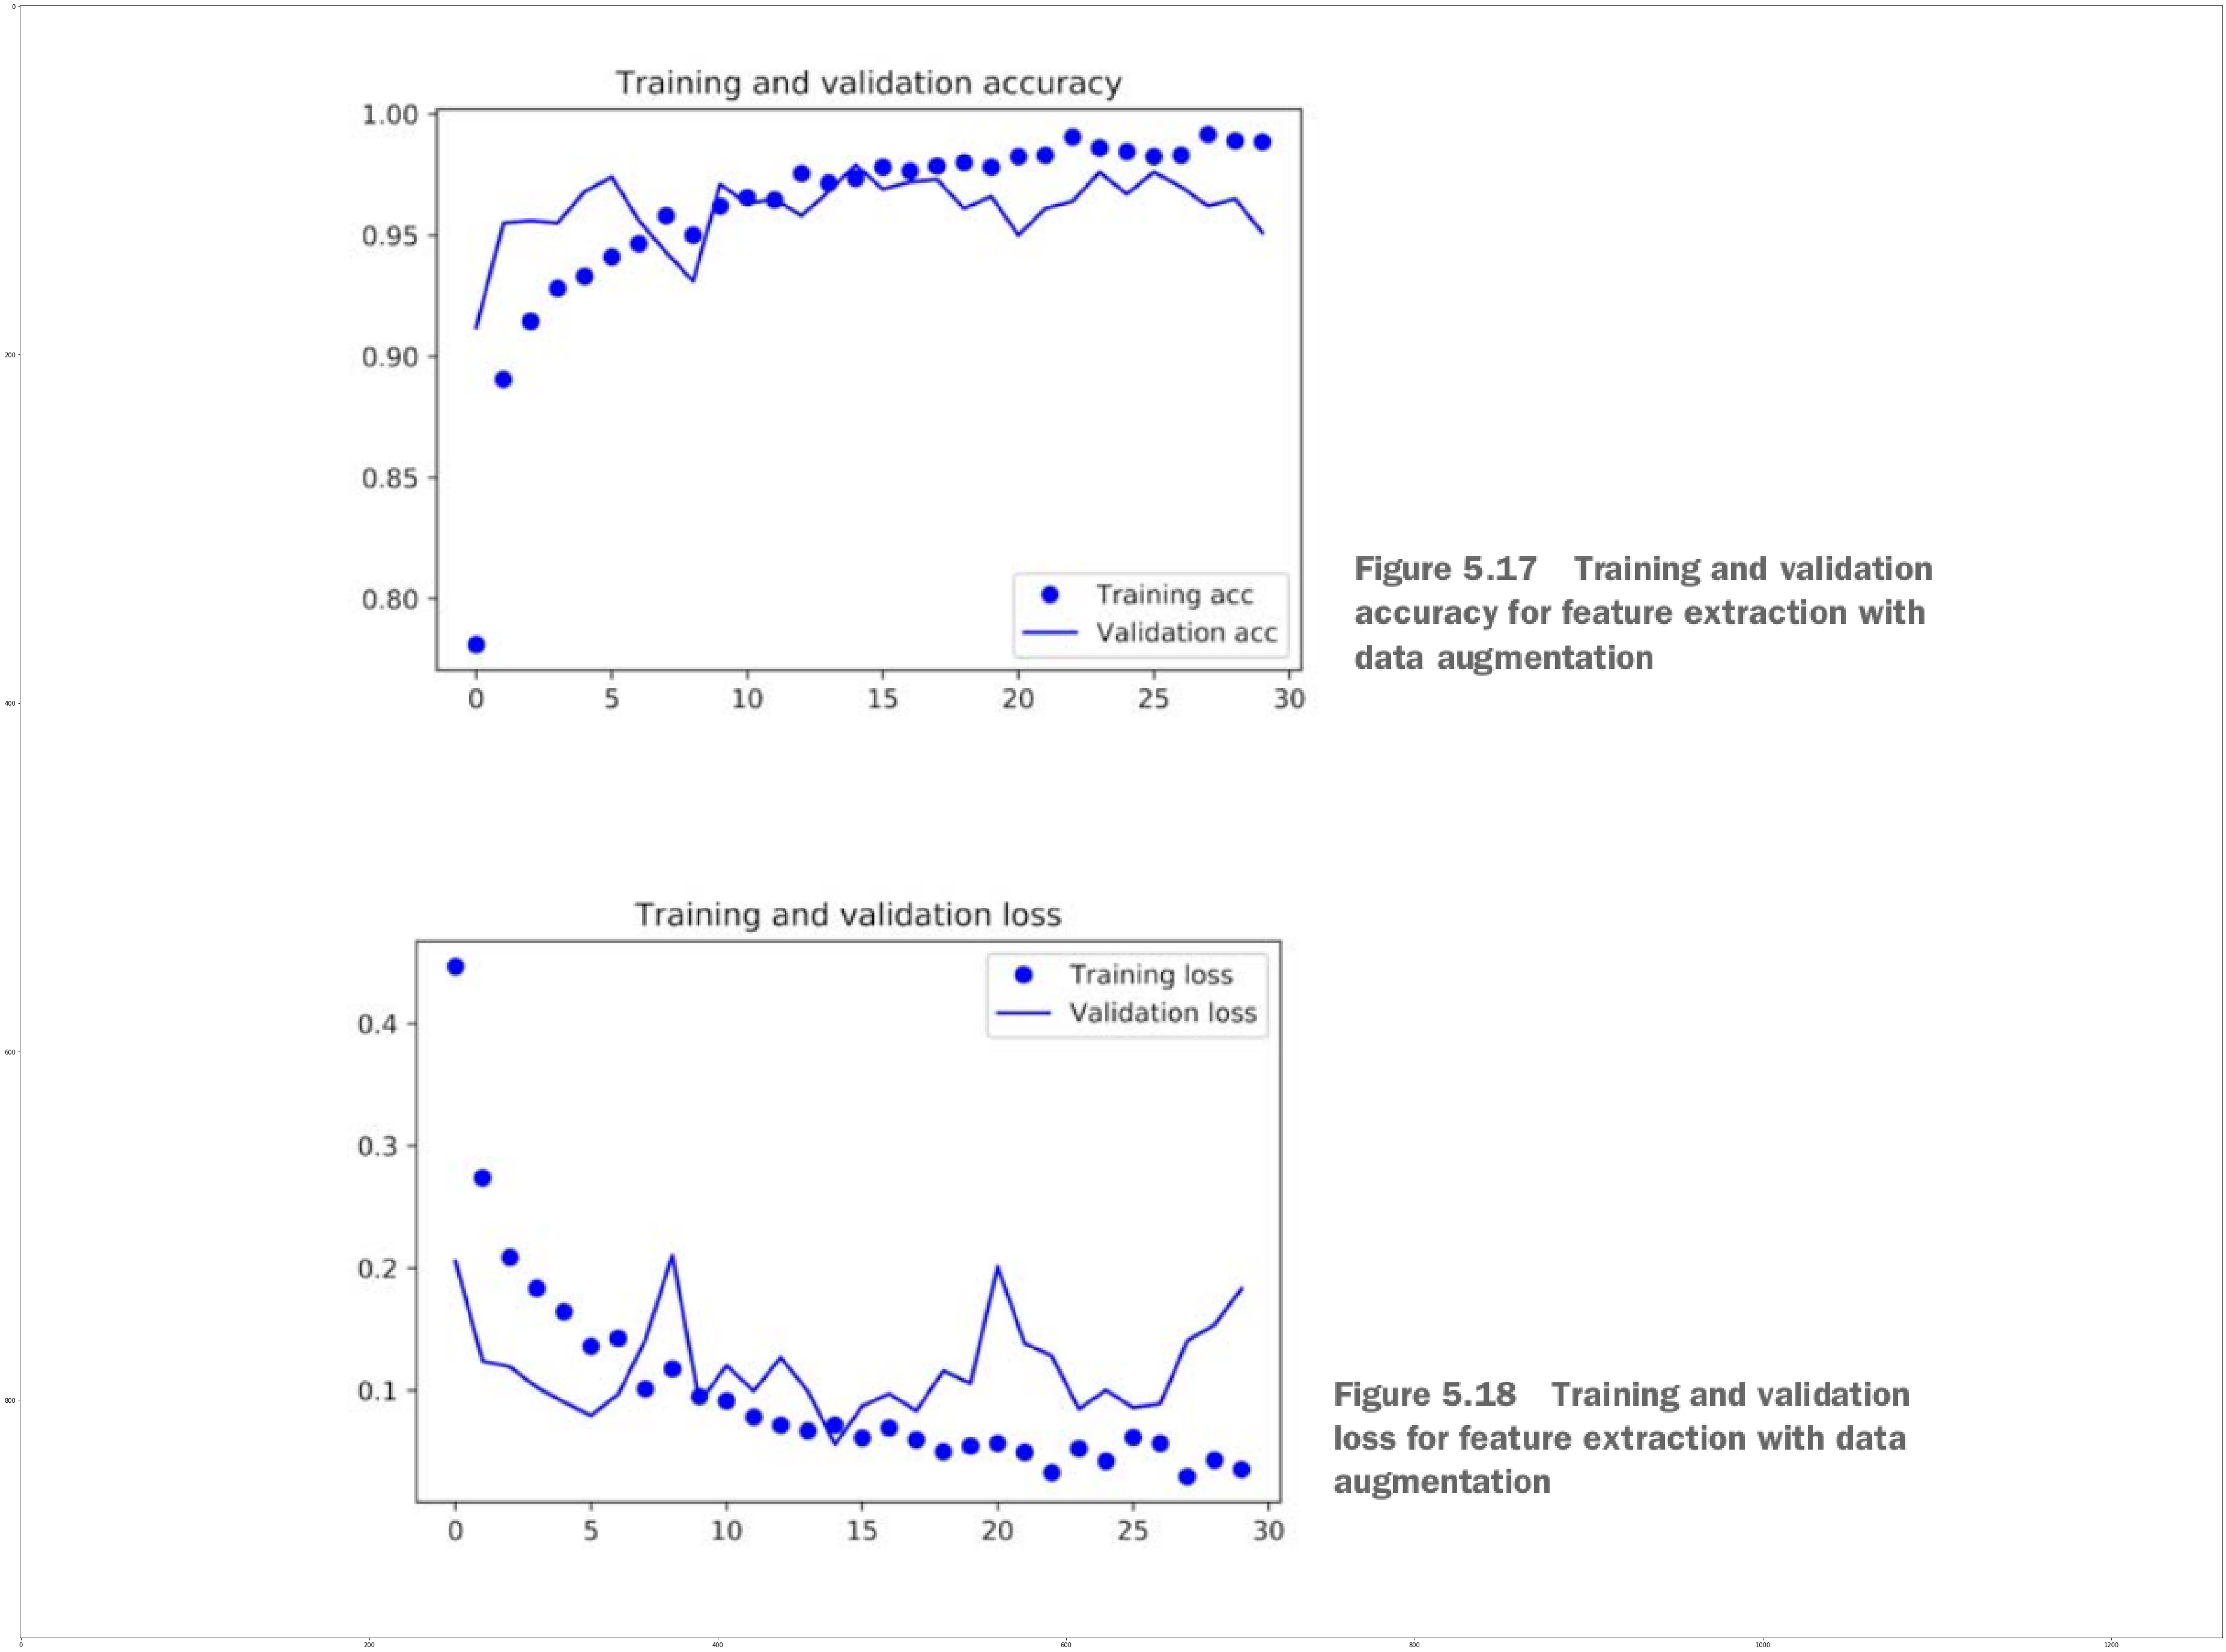

In [48]:
# figsize = (1,1 , 500, 10)
plt.figure(figsize=(500, 50))
img= mpimg.imread(path)
 
plt.imshow(img)

plt.show()

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import os 
root = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python'
img1 = 'Data_Augmentation.png'
img2 = 'explane_fine_turning.png'
img3 = 'model_summary.png'
img4 = 'picture_model.png'
img5 = 'Fine_turning.png'
path1 = os.path.join(root,img1)
path2 = os.path.join(root,img2)
path3 = os.path.join(root,img3)
path4 = os.path.join(root,img4)
path5 = os.path.join(root,img5)

### Explane Fine-turning 

Another widely used technique for model reuse, complementary to feature
extraction, is fine-tuning (see figure 5.19). Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more rele-
vant for the problem at hand.

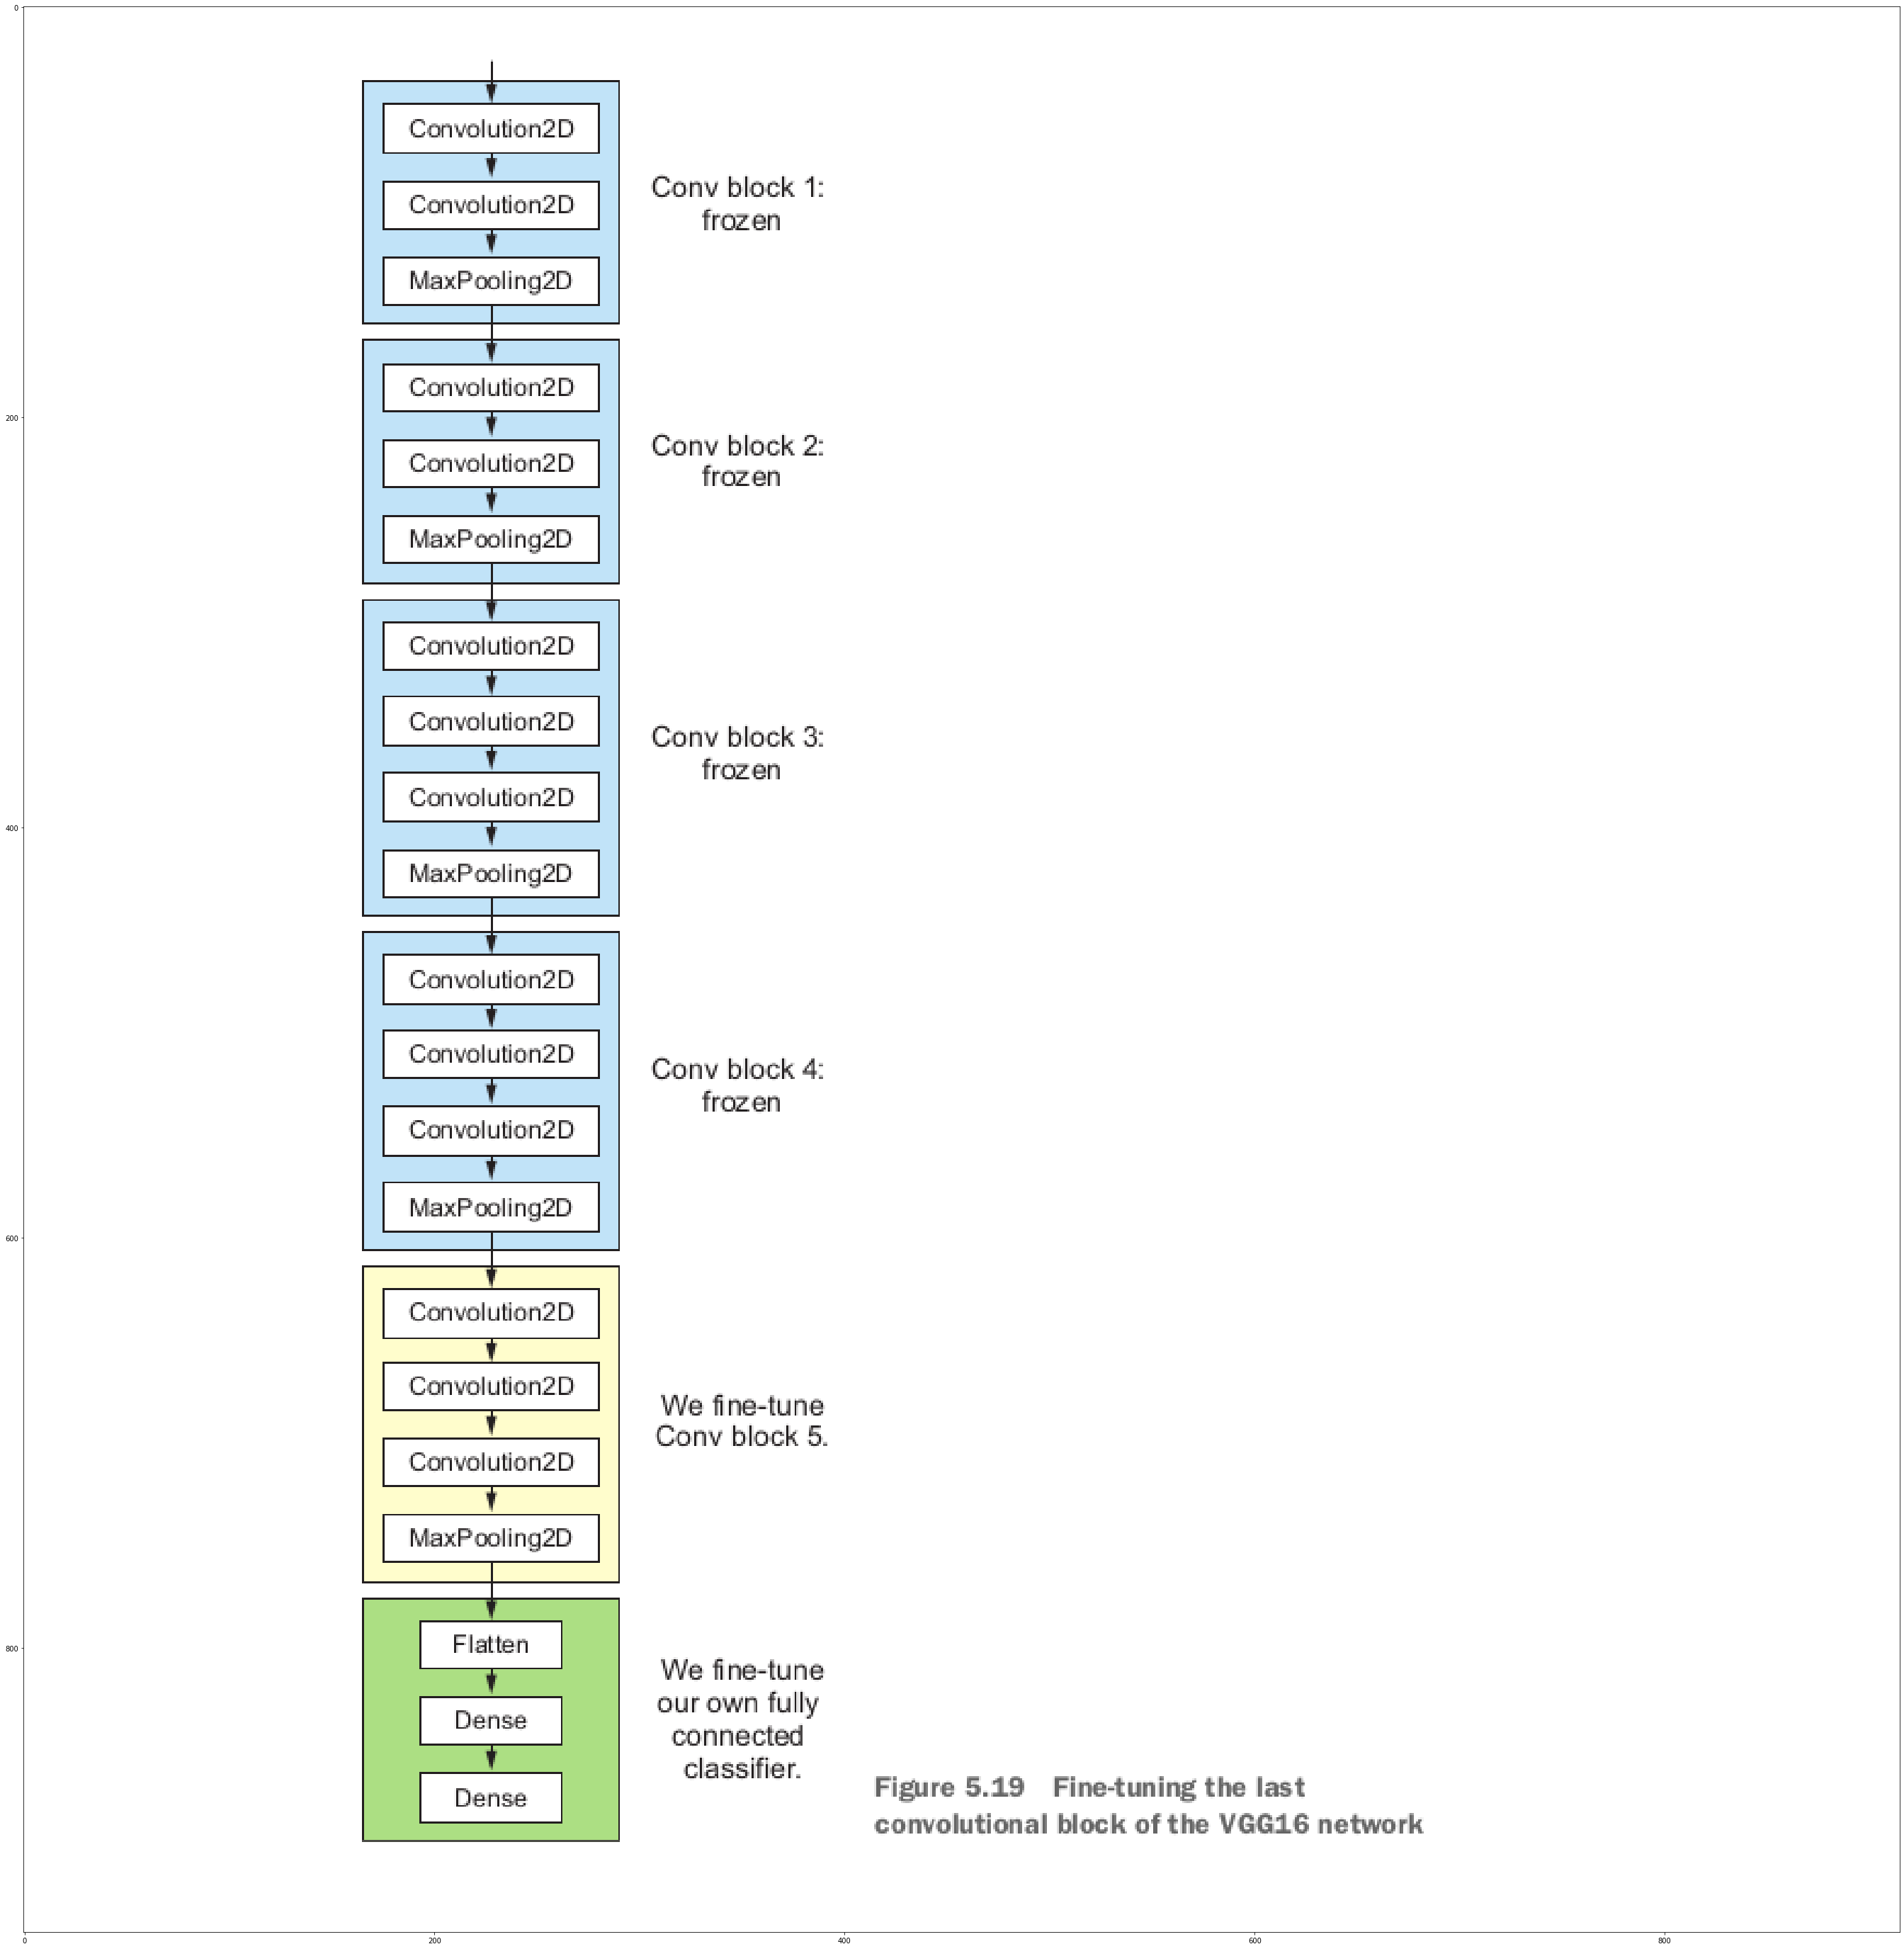

In [49]:
# figsize = (1,1 , 500, 10)
plt.figure(figsize=(200, 50))
img= mpimg.imread(path5)
 
plt.imshow(img)

plt.show()

I stated earlier that it’s necessary to freeze the convolution base of VGG16 in order to
be able to train a randomly initialized classifier on top. For the same reason, it’s only
possible to fine-tune the top layers of the convolutional base once the classifier on top
has already been trained. If the classifier isn’t already trained, then the error signal
propagating through the network during training will be too large, and the represen-
tations previously learned by the layers being fine-tuned will be destroyed. Thus the
steps for fine-tuning a network are as follow:


 1  Add your custom network on top of an already-trained base  network.

2  Freeze the base network.

3  Train the part you added.

4  Unfreeze some layers in the base network.

5  Jointly train both these layers and the part you added.

You already completed the first three steps when doing feature extraction. Let’s pro-
ceed with step 4: you’ll unfreeze your conv_base and then freeze individual layers
inside it.

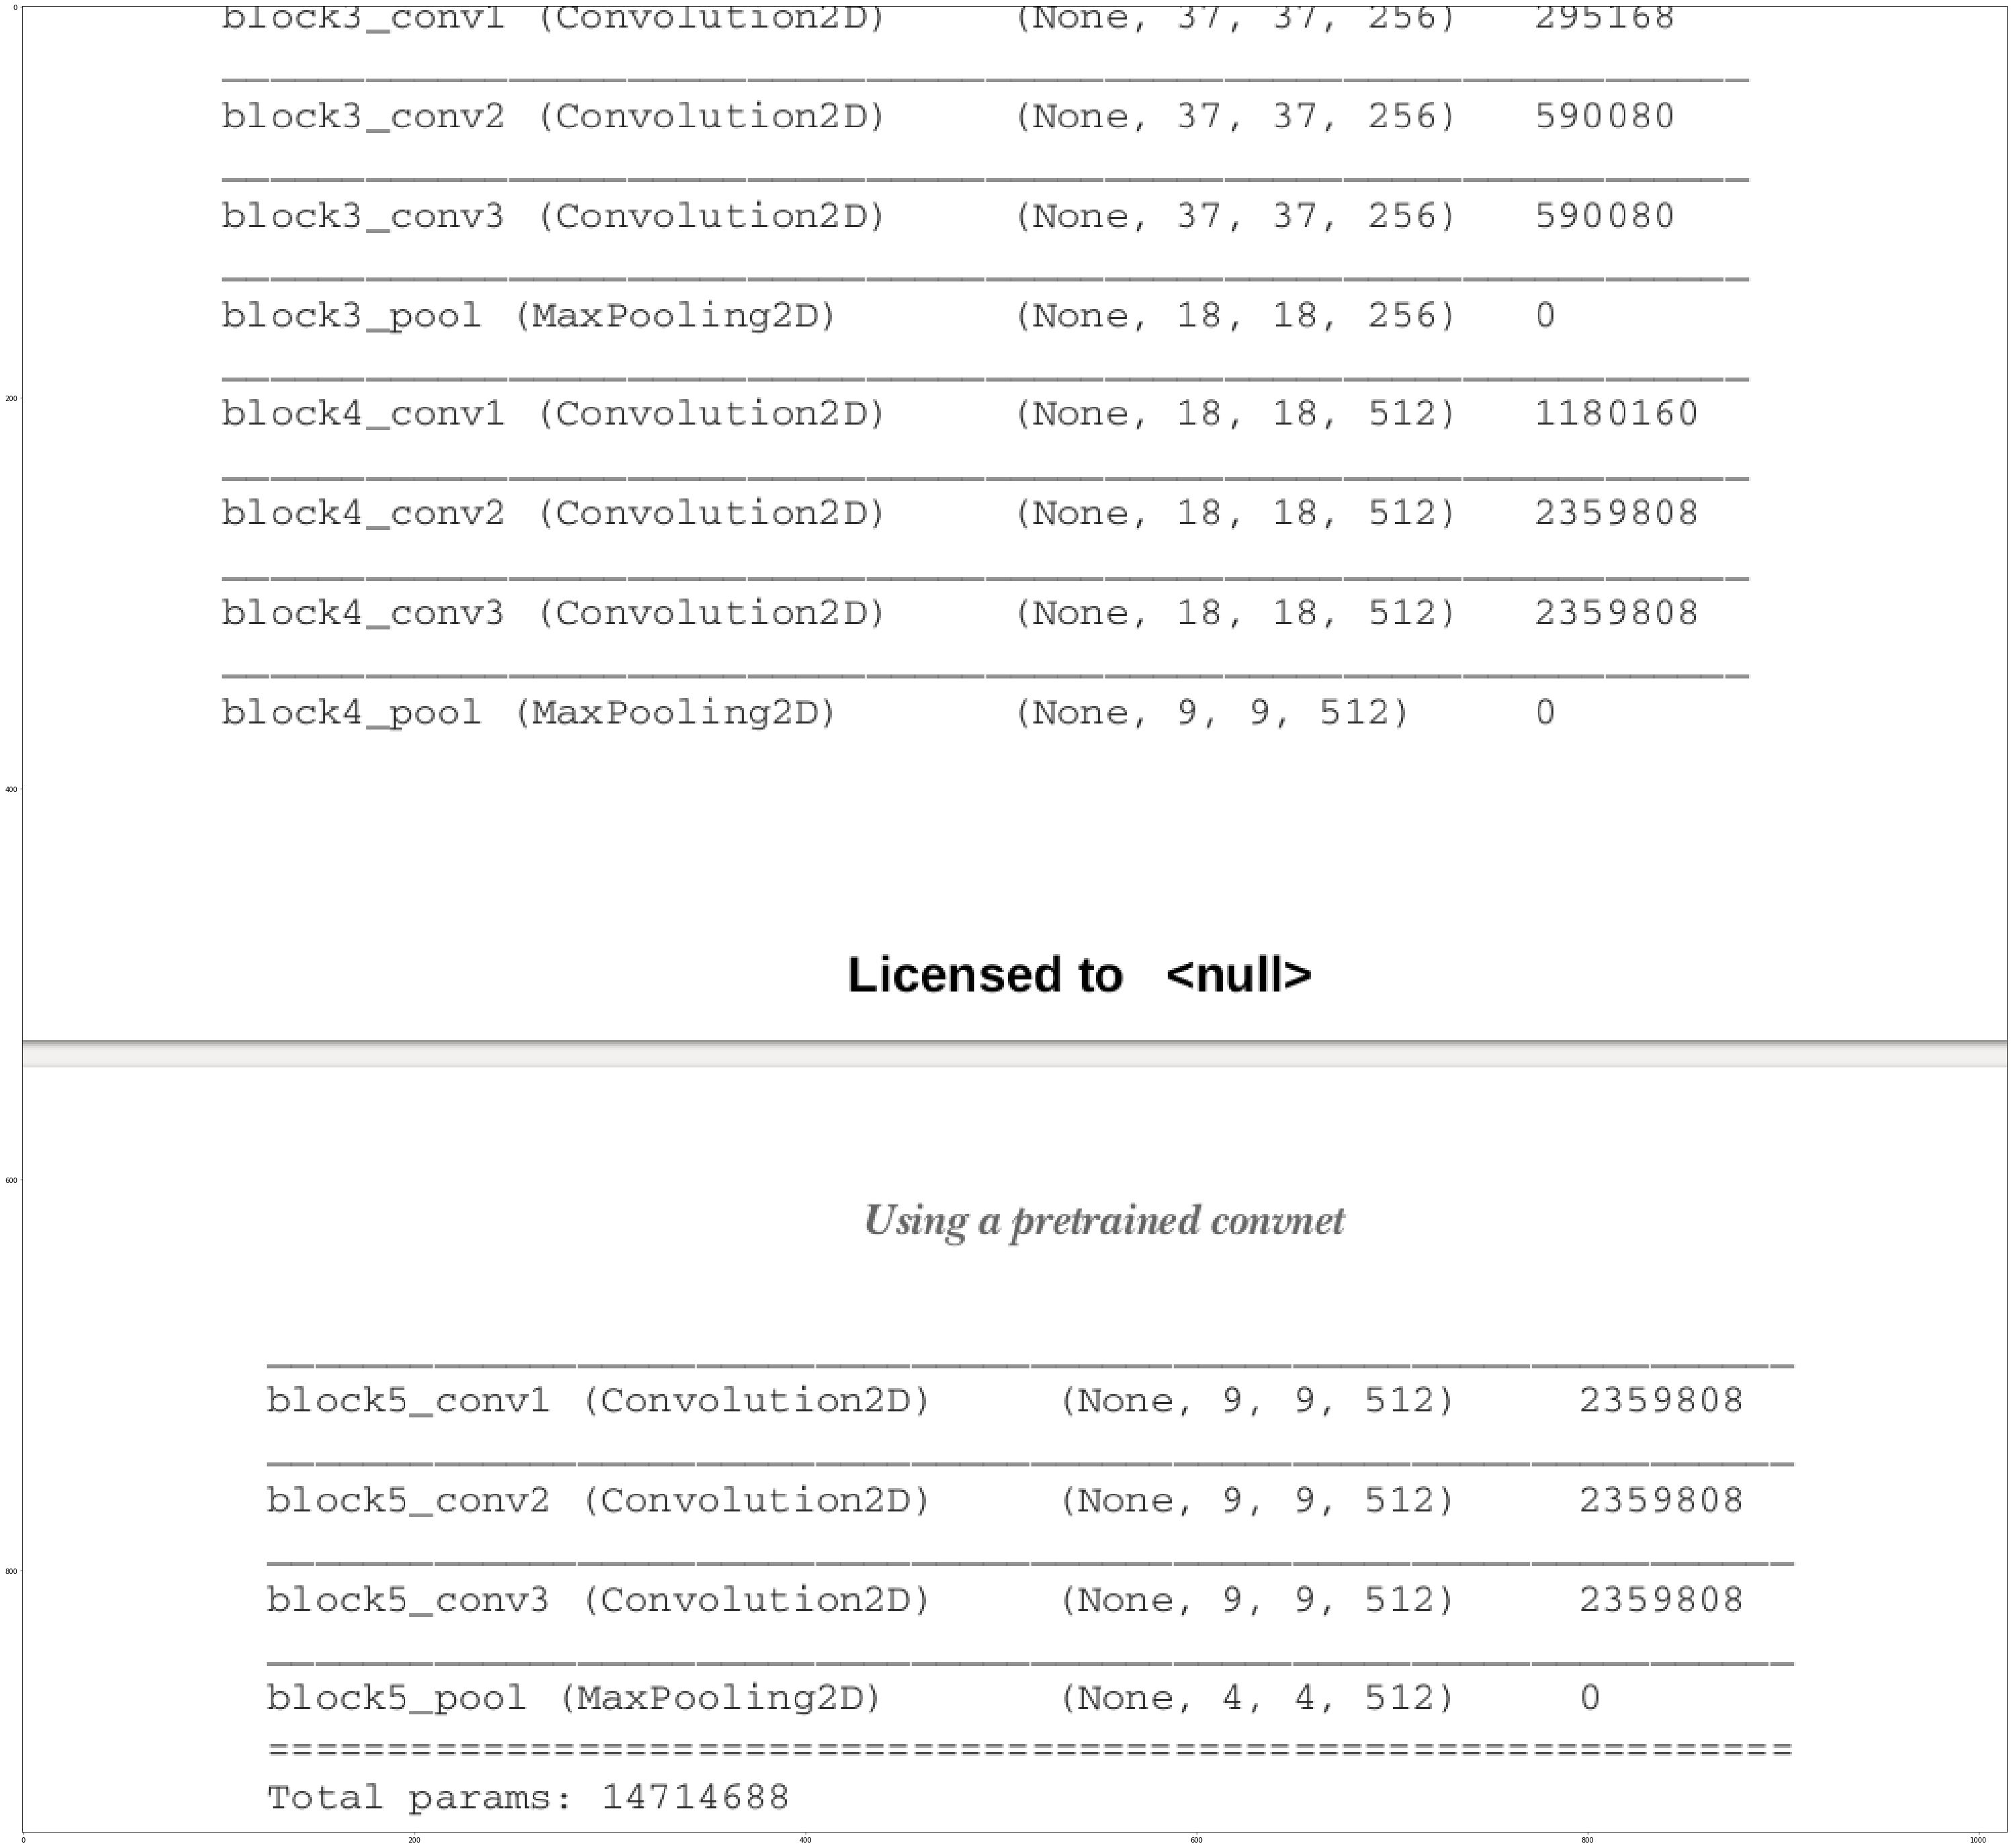

In [50]:
# figsize = (1,1 , 500, 10)
plt.figure(figsize=(200, 50))
img= mpimg.imread(path3)
 
plt.imshow(img)

plt.show()

### Freezing all layers up to a specific one

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

### Fine-tuning the model 

In [ ]:
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-5),
                metrics=['acc'])
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=100,
                validation_data=validation_generator,
                validation_steps=50)

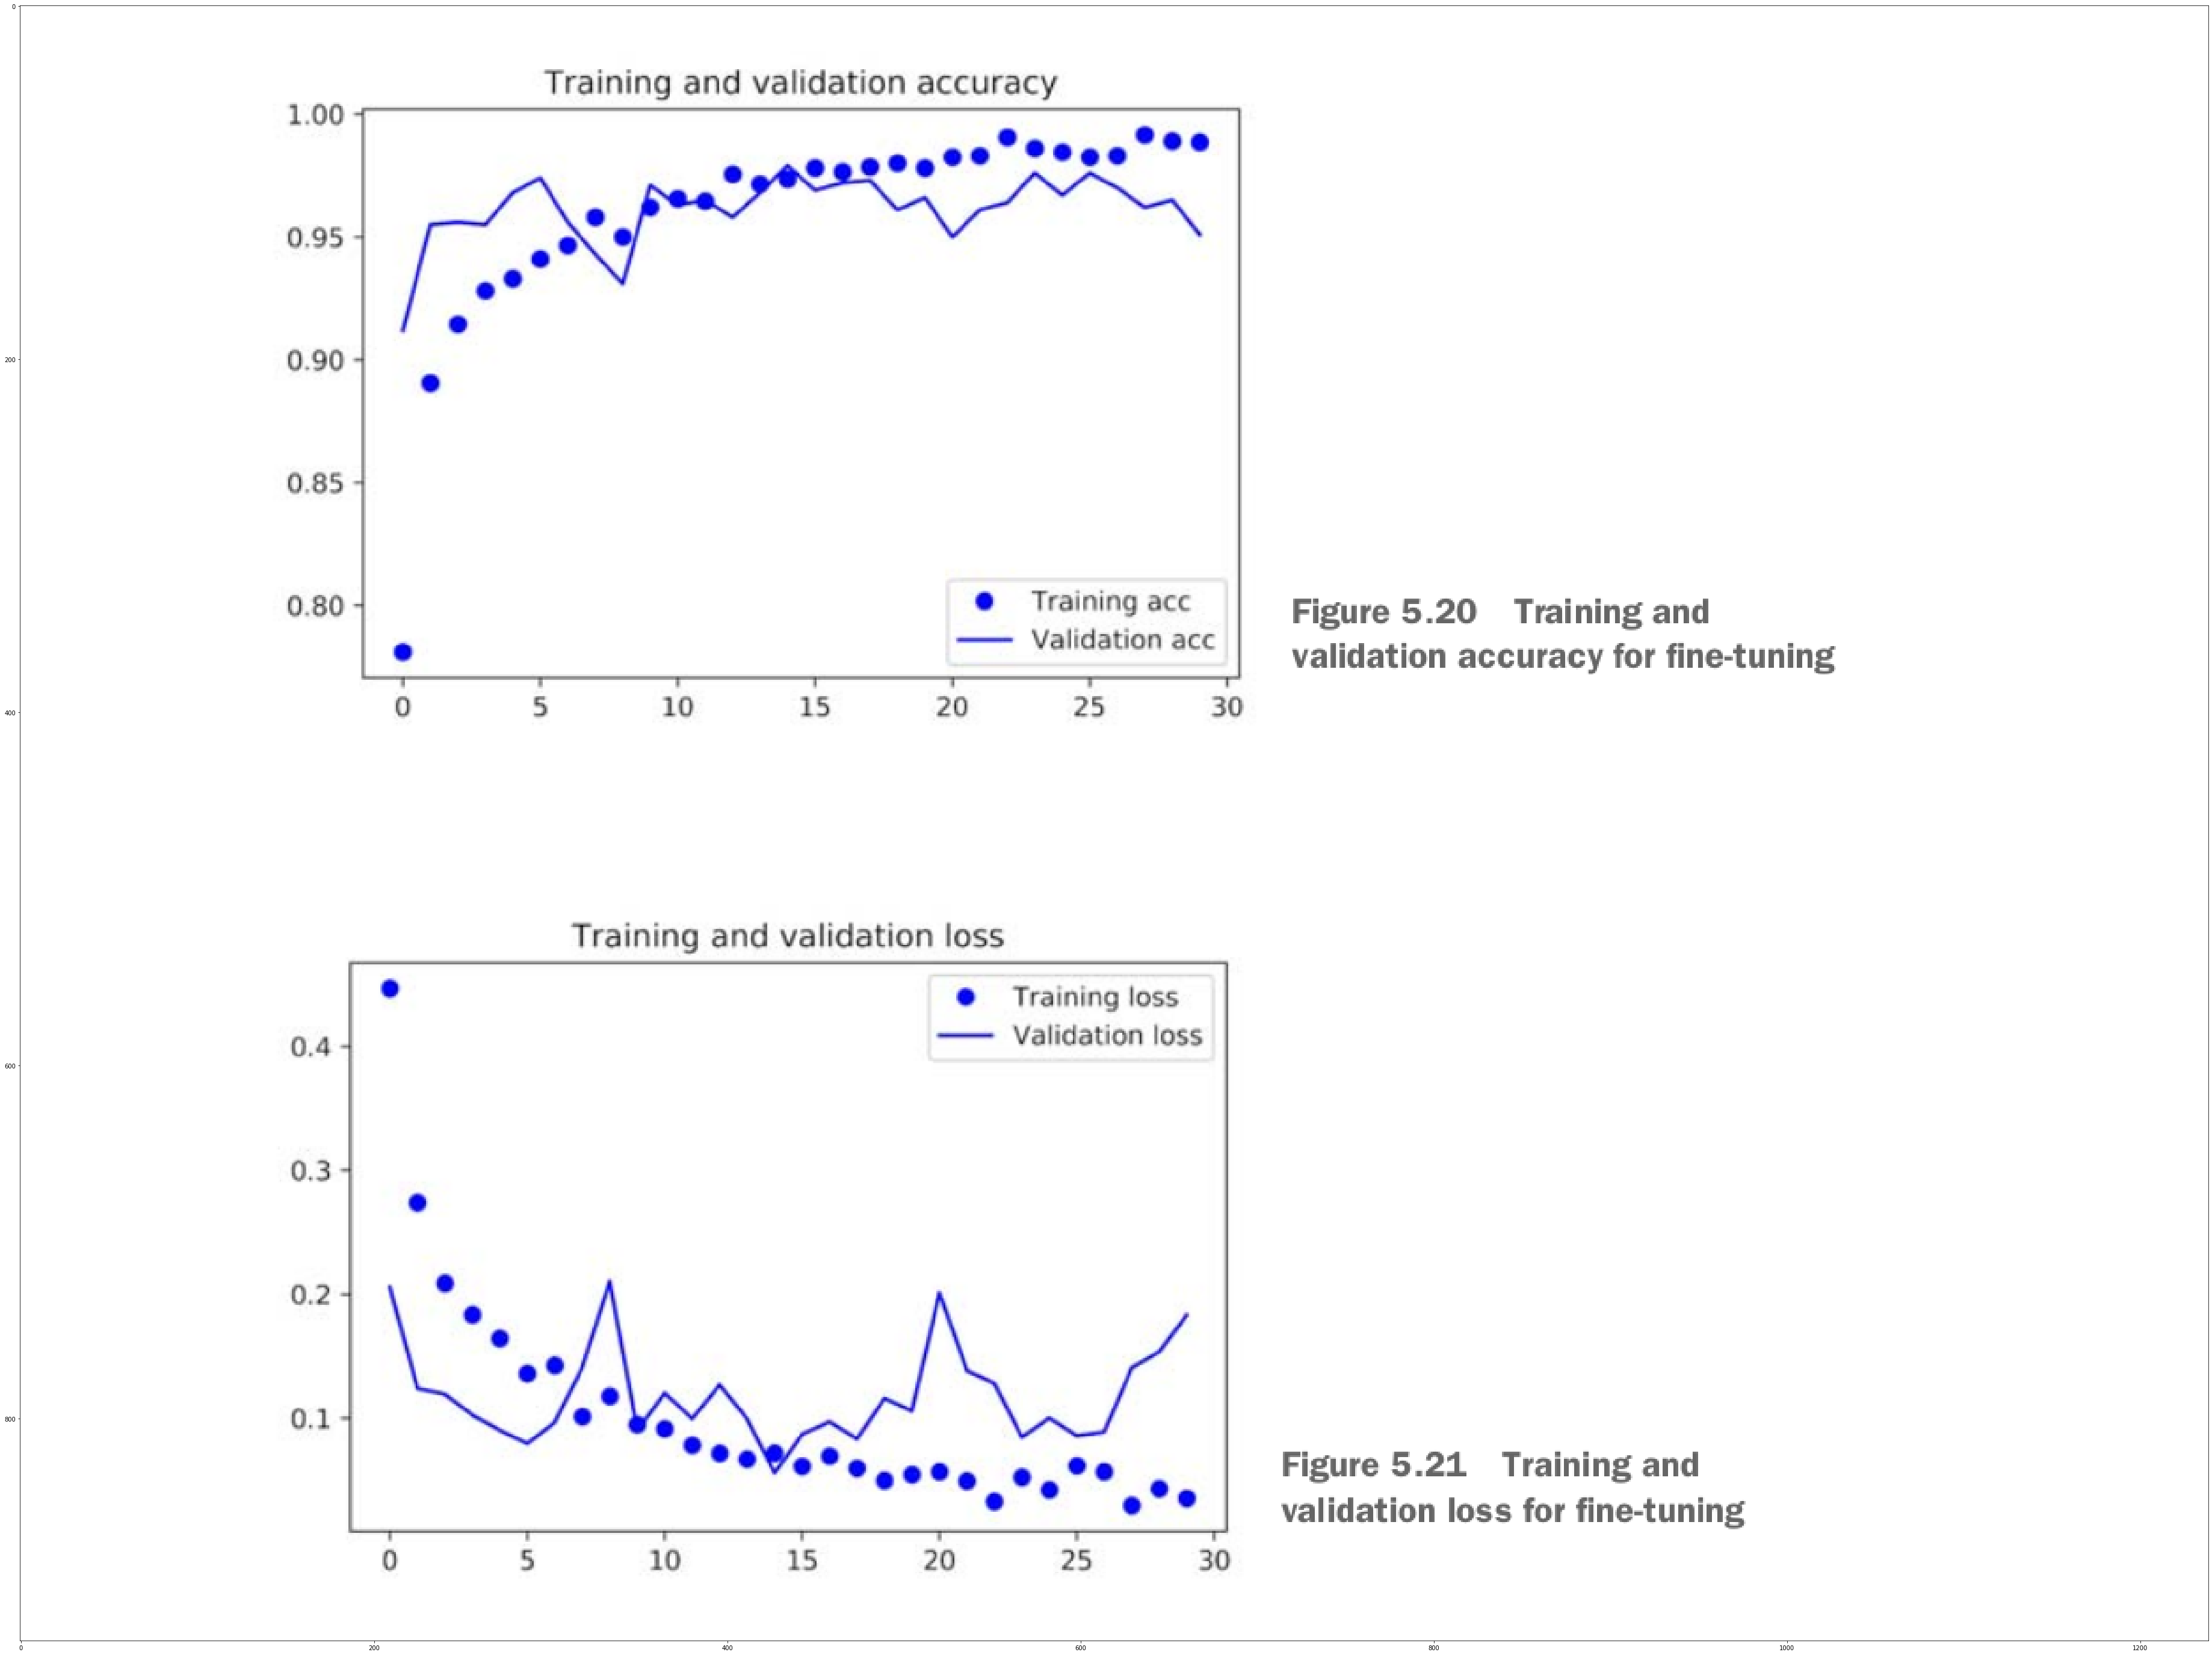

In [53]:
# figsize = (1,1 , 500, 10)
plt.figure(figsize=(500, 50))
img= mpimg.imread(os.path.join(root,'plot_fine_turning.png'))
 
plt.imshow(img)

plt.show()

### Smoothing the plots (làm mịn )

In [ ]:
model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(lr=1e-5),
                    metrics=['acc'])
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
return smoothed_points

plt.plot(epochs,
        smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
        smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')

plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

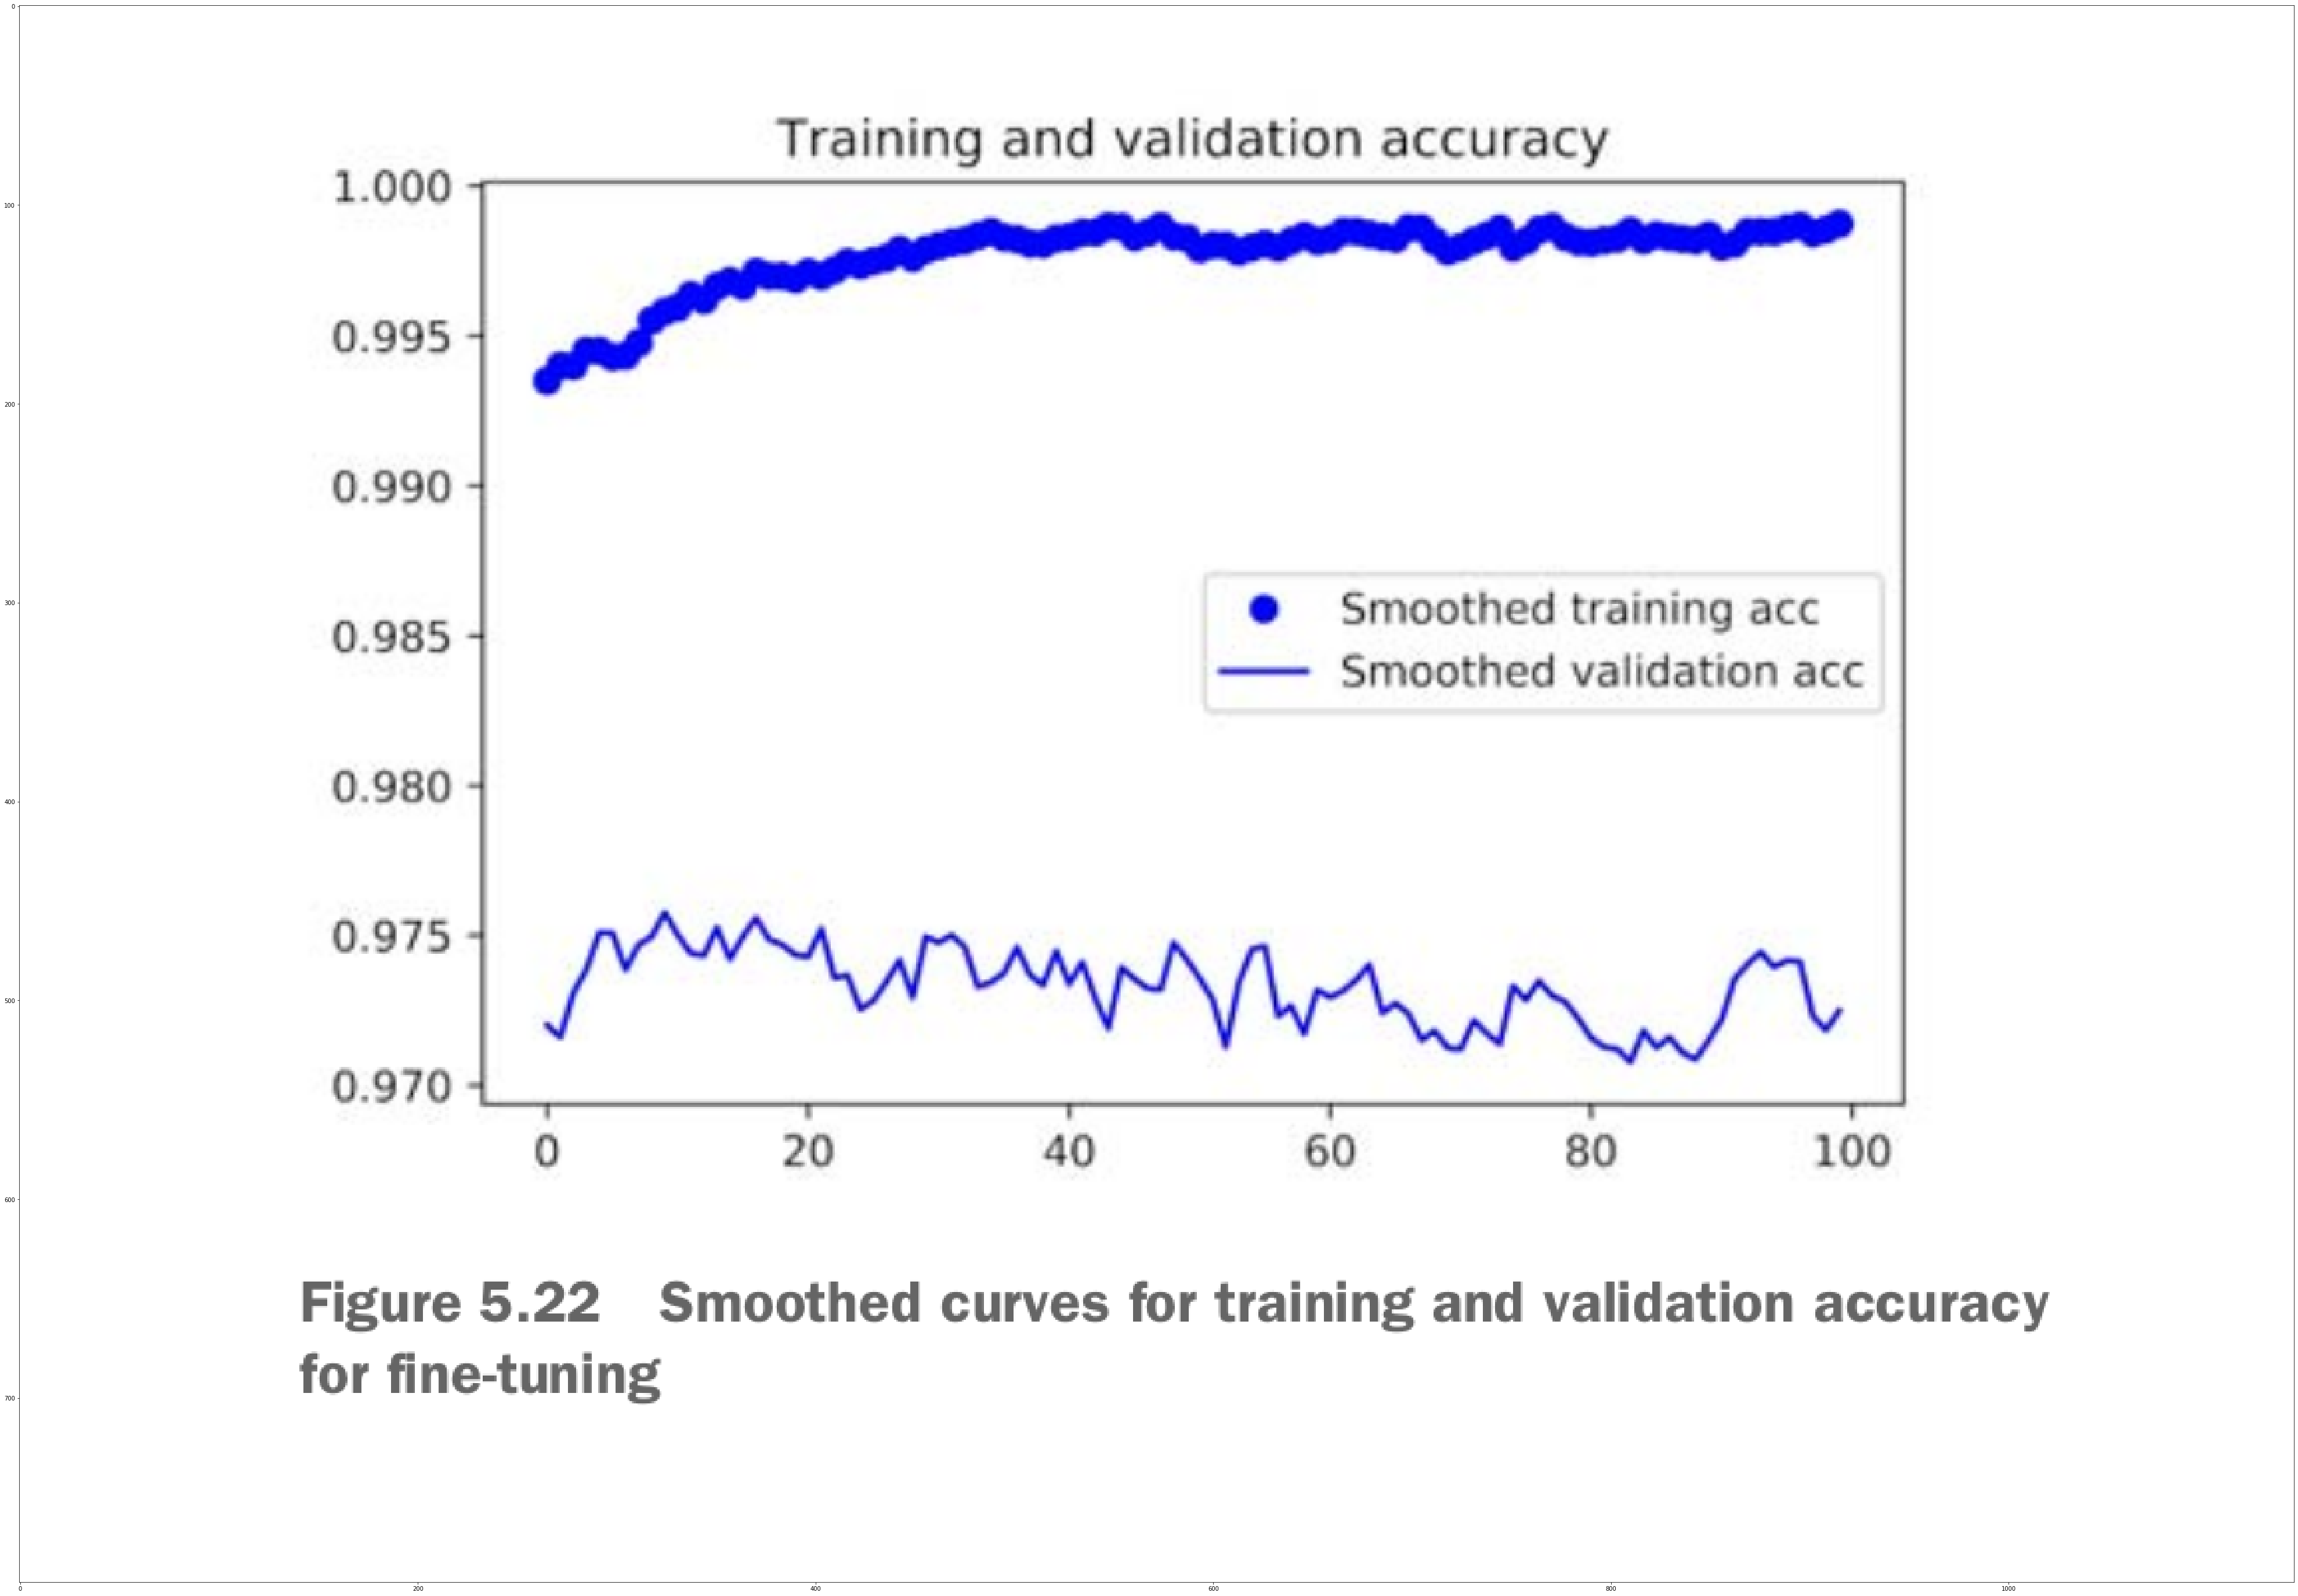

In [54]:
# figsize = (1,1 , 500, 10)
plt.figure(figsize=(500, 50))
img= mpimg.imread(os.path.join(root,'Smooth1.png'))
 
plt.imshow(img)

plt.show()

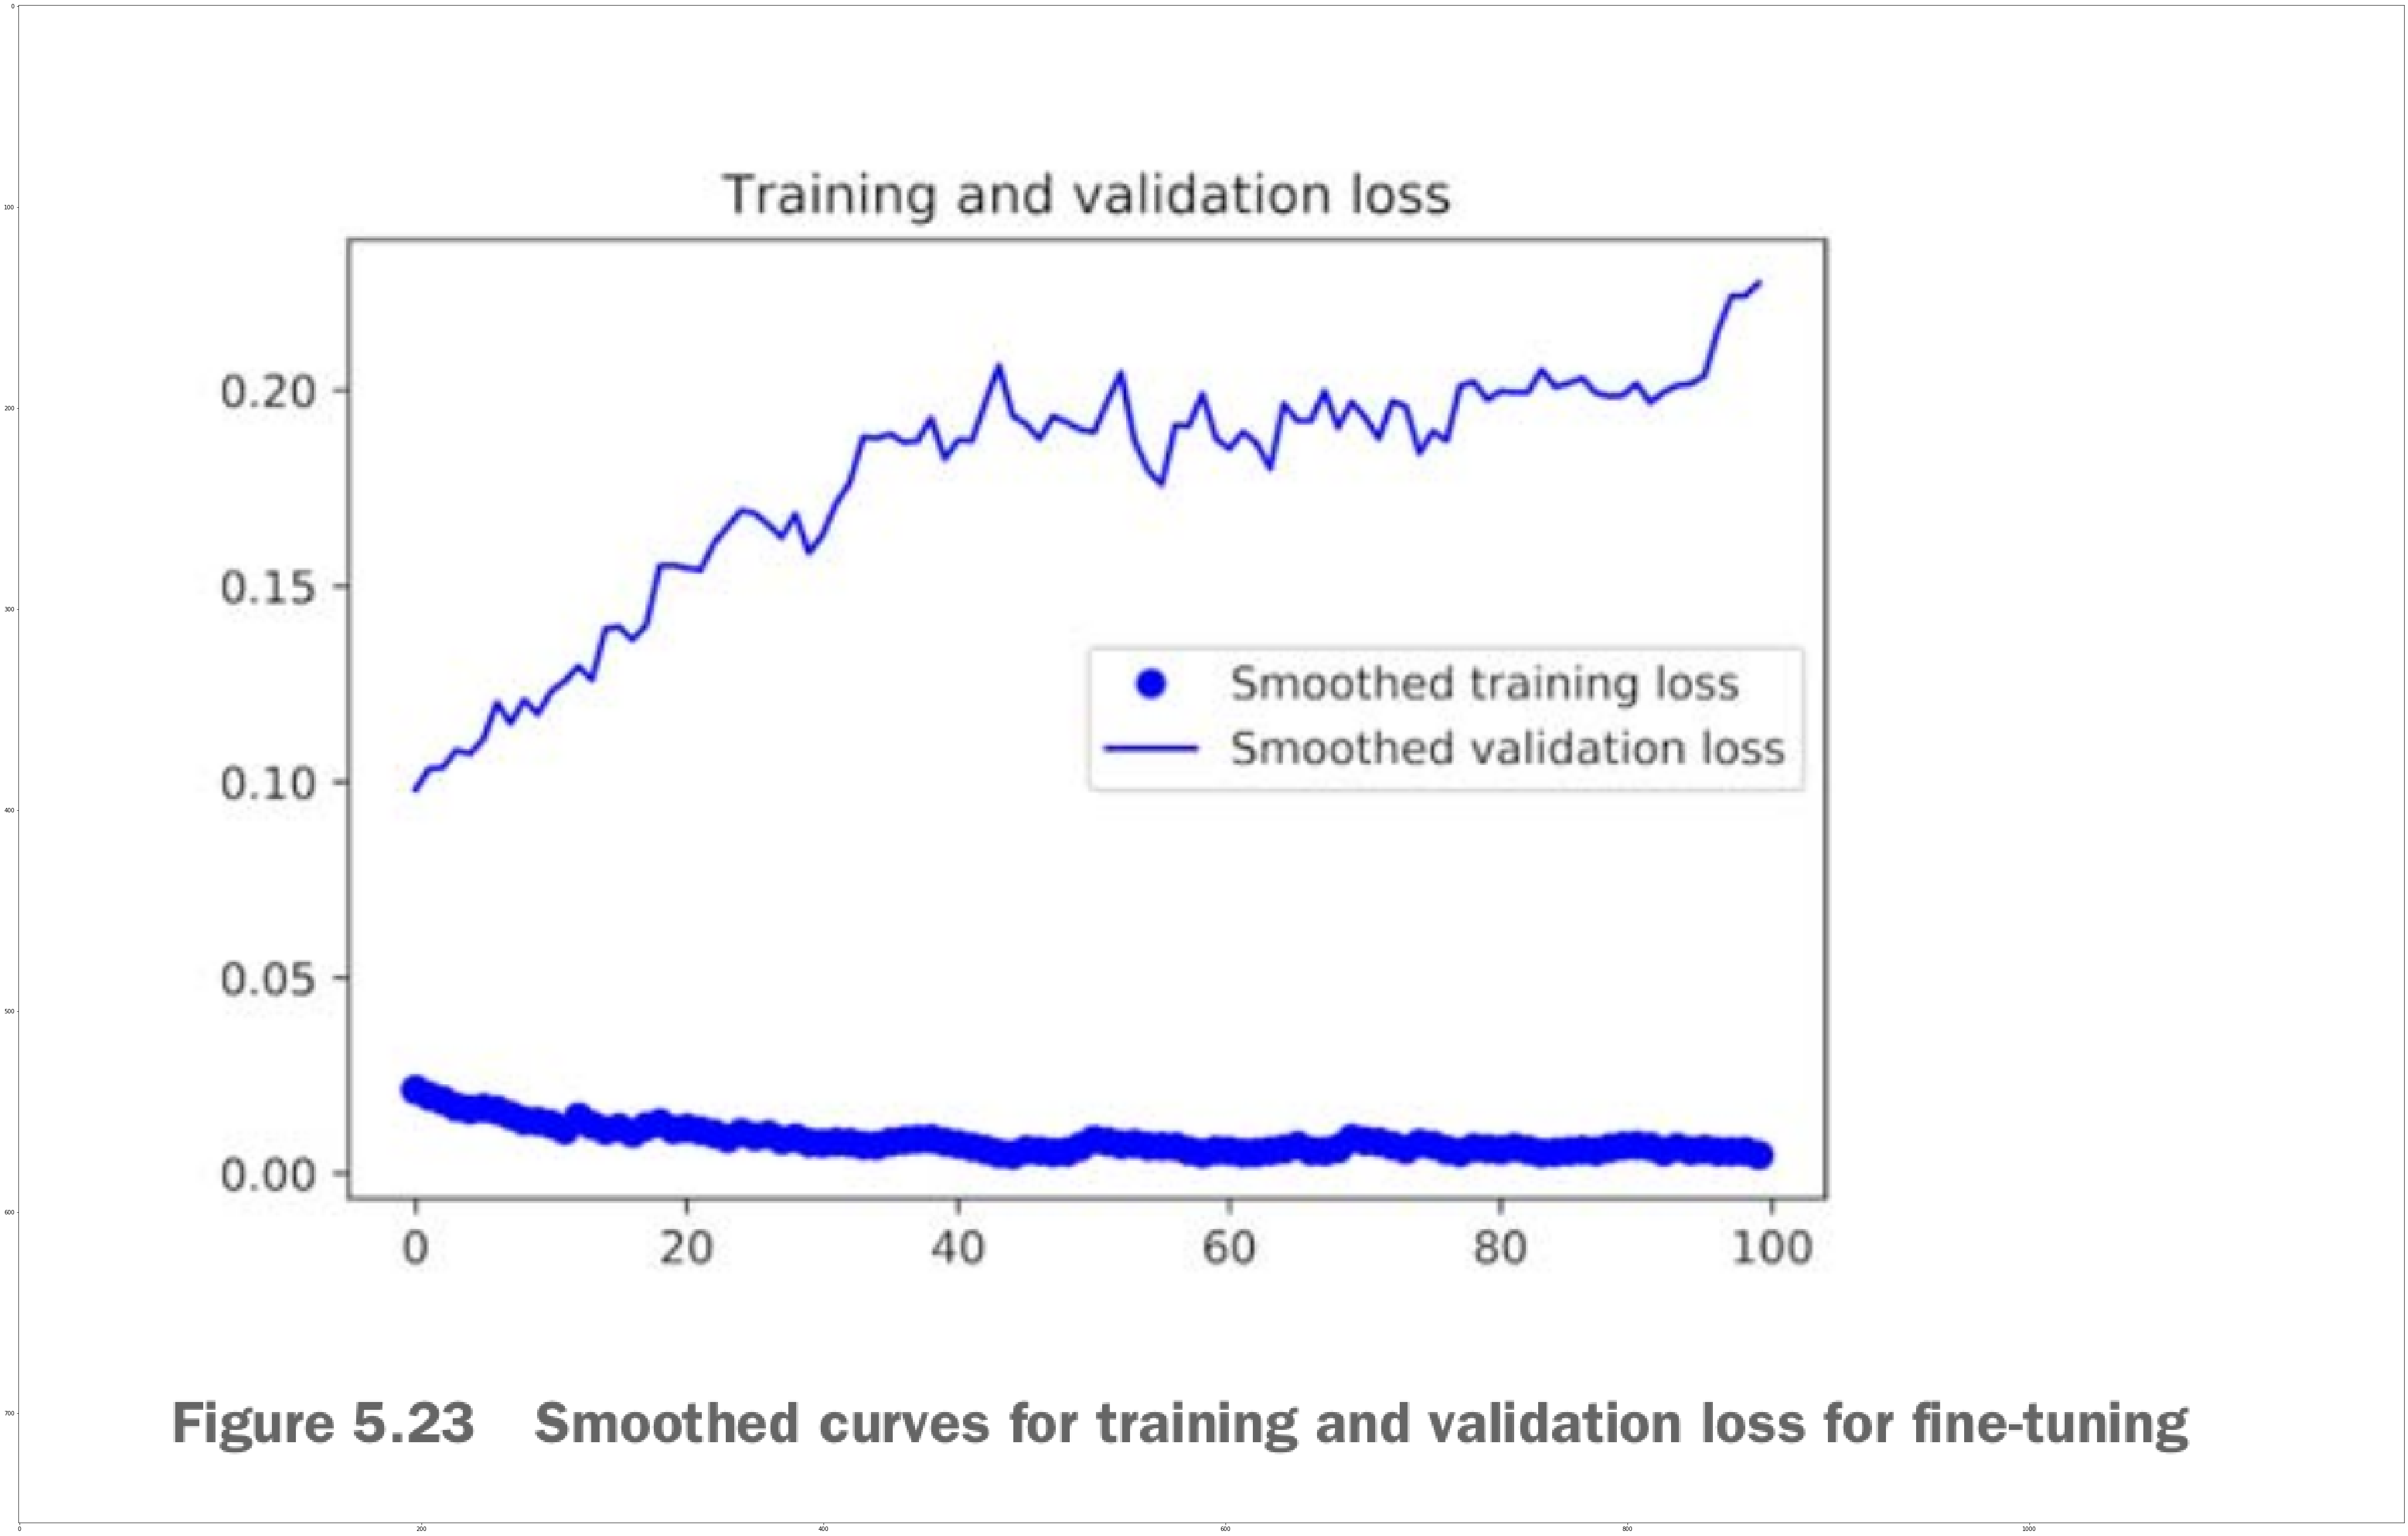

In [55]:
# figsize = (1,1 , 500, 10)
plt.figure(figsize=(500, 50))
img= mpimg.imread(os.path.join(root,'Smooth2.png'))
 
plt.imshow(img)

plt.show()

### Wrapping up
Here’s what you should take away from the exercises in the past two sections:
          
+ Convnets are the best type of machine-learning models for computer-vision tasks. It’s possible to train one from scratch even on a very small dataset, with decent results.

+ On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when you’re working with image data.

+ It’s easy to reuse an existing convnet on a new dataset via feature extraction. This is a valuable technique for working with small image datasets.

+ As a complement to feature extraction, you can use fine-tuning, which adapts to a new problem some of the representations previously learned by an existing model. This pushes performance a bit further.

Now you have a solid set of tools for dealing with image-classification problems—in
particular with small datasets.

In [26]:
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt 

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(lr=1e-4),
                    metrics=['acc'])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [29]:
img_path = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/dogs-vs-cats/test1/10000.jpg'
img_path_cats = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/dogs-vs-cats/test1/7.jpg'


In [32]:
from keras.preprocessing import image 
import numpy as np 

def Preprocessing_image(img_path):
    img = image.load_img(img_path, target_size = (150,150))
    img_tensor = image.img_to_array (img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor /= 255
    return img_tensor

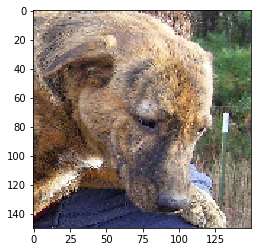

In [39]:
plt.imshow(Preprocessing_image(img_path)[0])
plt.show()

img_tensor = Preprocessing_image(img_path)

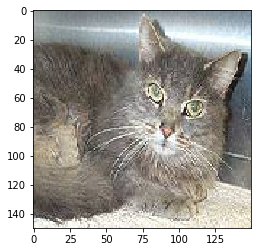

In [47]:
plt.imshow(Preprocessing_image(img_path_cats)[0])
plt.show()
img_tensor_cat = Preprocessing_image(img_path_cats)

### Instantiating a model from an input tensor and a list of output tensors

In [48]:
from keras import models 

layer_outputs = [layer.output for layer in model.layers[:8]] # extracts the output of the top eight layers


activation_model = models.Model (inputs = model.input, outputs = layer_outputs) 
# creates a model that will return these outputs, give the model input

# Running the model in predict mode

activations = activation_model.predict(img_tensor) # return a list of five Numpy array: one array per layer actvtion 
activations_cat = activation_model.predict(img_tensor_cat)


first_layer_activation = activations[0]
first_layer_activation_cat = activations_cat[0]
print(first_layer_activation.shape),print(first_layer_activation_cat.shape)

(1, 148, 148, 32)
(1, 148, 148, 32)


(None, None)

### Visualizing the fourth channel 

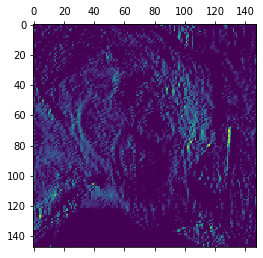

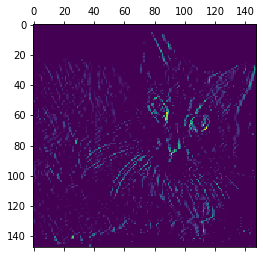

In [63]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()
plt.matshow(first_layer_activation_cat[0,:,:, 4], cmap = 'viridis' )
plt.show()

# dò cạnh chéo 

### Visualizing the seventh channel

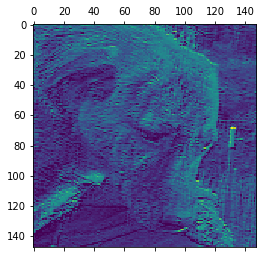

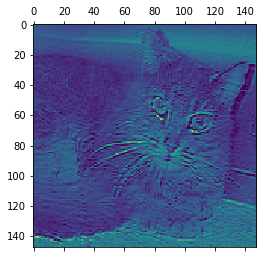

In [64]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()
plt.matshow(first_layer_activation_cat[0,:,:,7], cmap = 'viridis' )
plt.show()

# dò độ sáng 

### Visualizing every channel in every intermediate activation

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


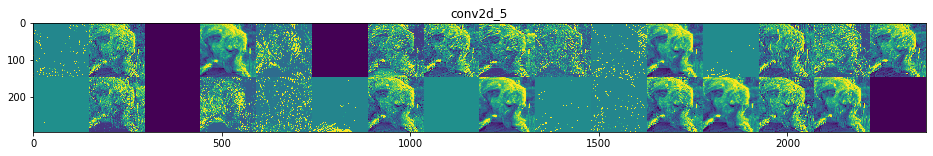

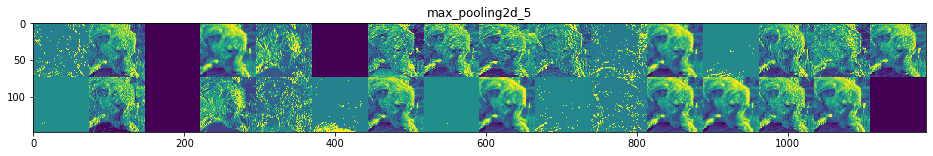

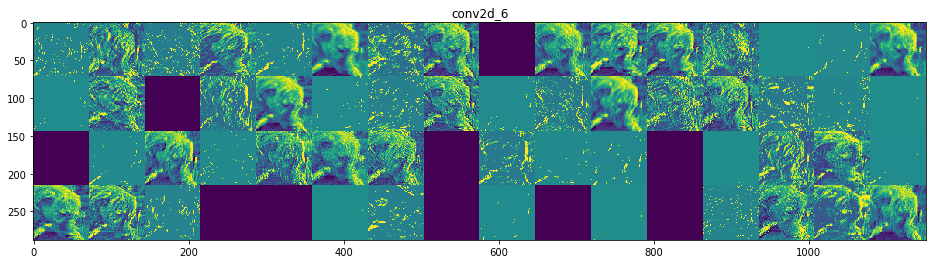

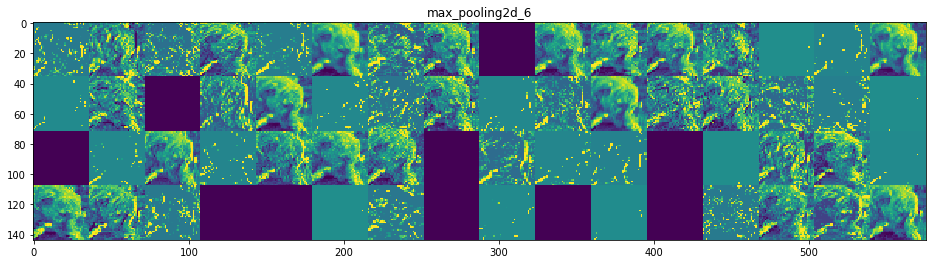

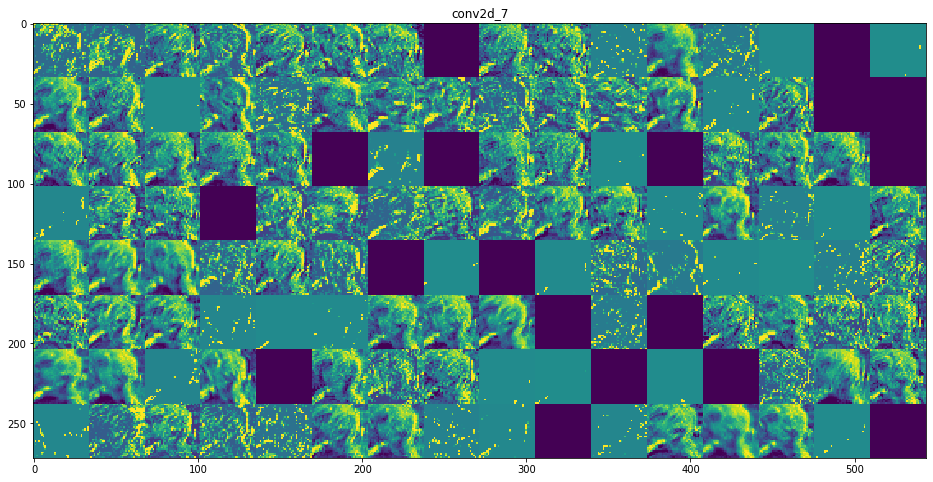

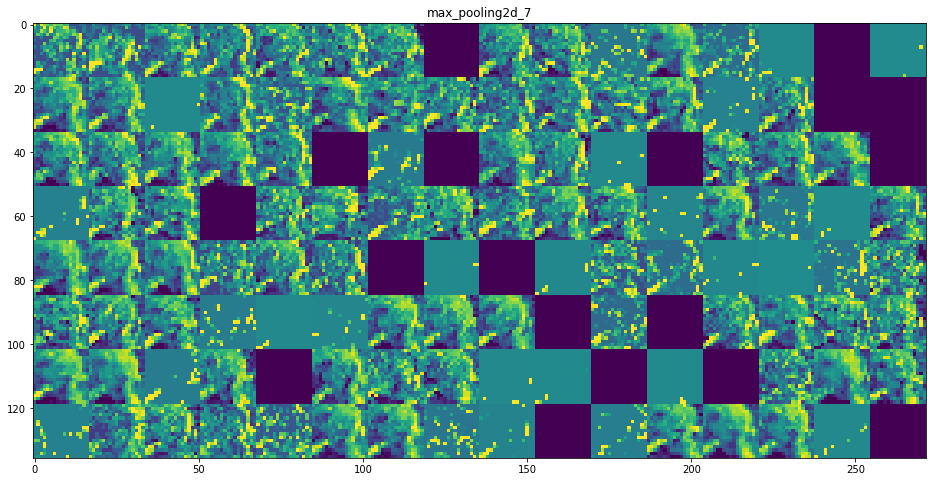

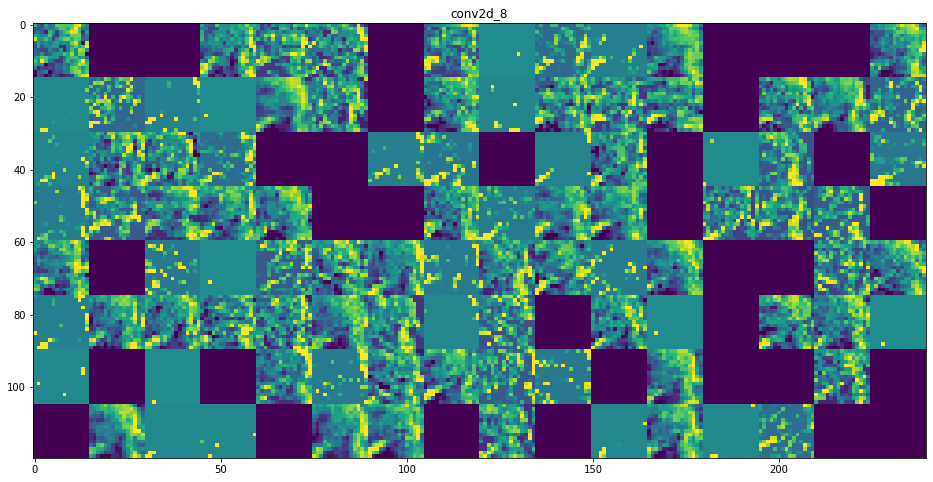

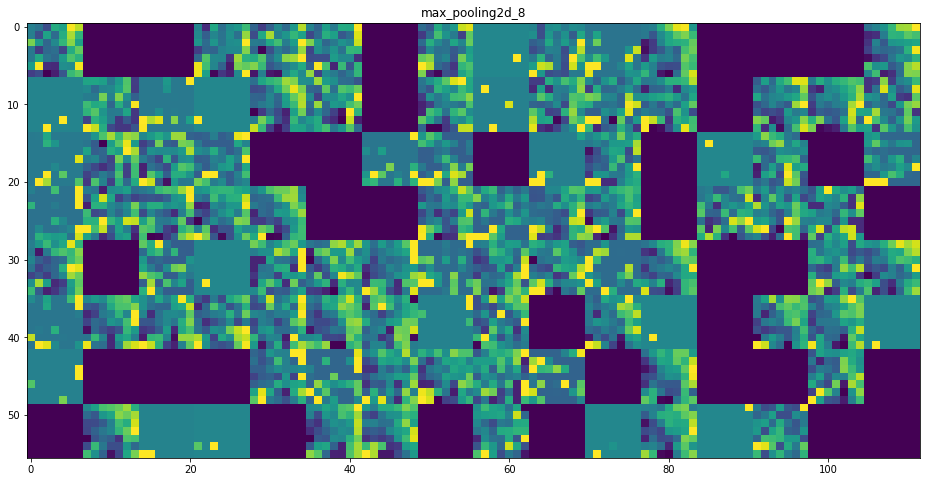

In [67]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
# Names of the layers , so you can have them as part of your plot 
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):  # displays the feature maps

    n_features = layer_activation.shape[-1]  # Number of feature in the feature map 

    size = layer_activation.shape[1] # The feature map has shape (I, size, size, n_features)

    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):

            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()  # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                                                        row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



### There are a few things to note here:
+ The first layer acts as a collection of various edge detectors. At that stage, the activations retain almost all of the information present in the initial picture.

+ As you go higher, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as “cat ear” and “cat eye.” Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
+ The sparsity of the activations increases with the depth of the layer: in the first layer, all filters are activated by the input image; but in the following layers, more and more filters are blank. This means the pattern encoded by the filter isn’t found in the input image.

## Visualizing convnet filters

### Defining the loss tensor for filter visualization

In [69]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

### Obtaining the gradient of the loss with regard to the input

In [70]:
grads = K.gradients(loss, model.input)[0]

# The call to gradients returns a list of
# tensors (of size 1 in this case). Hence,
# you keep only the first element—
# which is a tensor.

### Gradient-normalization trick

In [71]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
# Add 1e–5 before dividing
# to avoid accidentally
# dividing by 0.


### Fetching Numpy output values given Numpy input values

In [72]:
iterate = K.function([model.input], [loss, grads])

import numpy as np

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

### Loss maximization via stochastic gradient descent

In [73]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

step = 1.   #Magnitude of each gradient update
for i in range(40):                 # runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data])    # computes the loss value and gradient value 
                        
    input_img_data += grads_value * step   # adjust the input image in the direction that max the loss


### Utility function to convert a tensor into a valid image

In [74]:
def deprocess_image(x):
    #     Normalizes the tensor: centers on 0, ensures that std is 0.1 Clips to [0, 1]
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255       # Converts to an RGB array 
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [75]:
def generate_pattern(layer_name, filter_index, size=150):
    # buids a loss function that max the activation of the nth filter of the layer inder consideration 
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]  # Computes the fradent of the input picture with regard to this loss 
    
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) #    Normalization trick: normalizes the gradient

    
    iterate = K.function([model.input], [loss, grads]) # Returns the loss and grads given the input picture
   
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img = input_img_data[0]
    return deprocess_image(img)
    
    

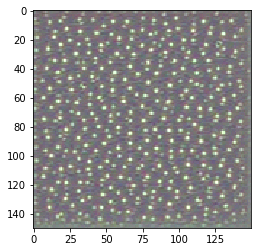

In [76]:
plt.imshow(generate_pattern('block3_conv1', 0 ))

### Generating a grid of all filter response patterns in a layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


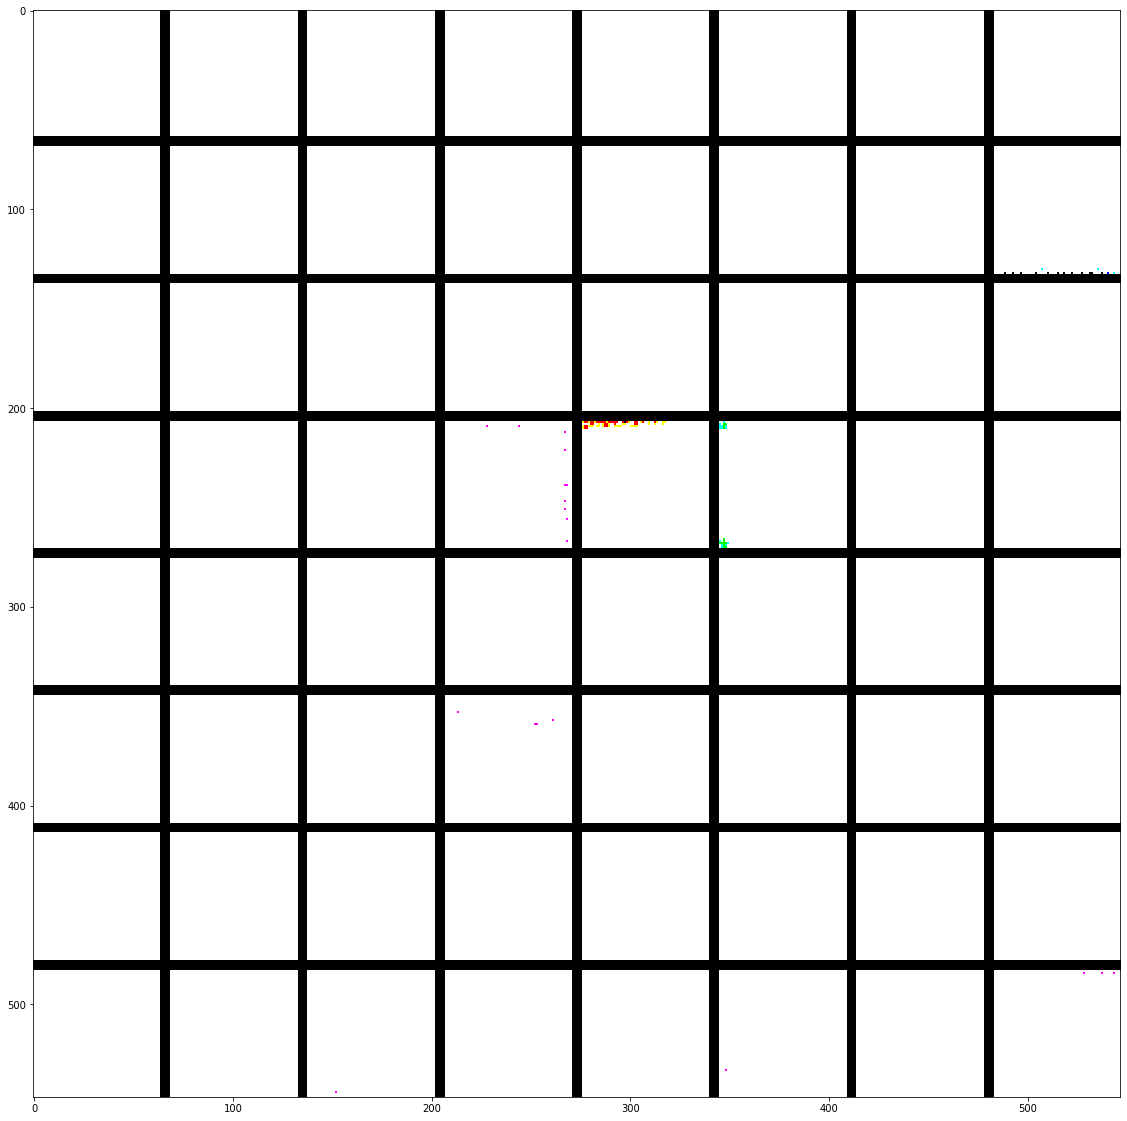

In [79]:
layer_name = 'block2_conv1'
size = 64           # Empty (black) image to store results 
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):         #Iterates over the rows of the results grid
    for j in range(8):     #Iterates over the columns of the results grid
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        # Generates the pattern for filter i + (j*8) in layer_name
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                    vertical_start: vertical_end, :] = filter_img
        # Puts the result in the square (i,j) of the results grid 
        
plt.figure(figsize = (20,20))    # Dislays the results grid 
plt.imshow(results)

These filter visualizations tell you a lot about how convnet layers see the world: each
layer in a convnet learns a collection of filters such that their inputs can be expressed
as a combination of the filters. This is similar to how the Fourier transform decom-
poses signals onto a bank of cosine functions. The filters in these convnet filter banks
get increasingly complex and refined as you go higher in the model:


+ The filters from the first layer in the model ( block1_conv1 ) encode simple directional edges and colors (or colored edges, in some cases).
+ The filters from block2_conv1 encode simple textures made from combina- tions of edges and colors.
+ The filters in higher layers begin to resemble textures found in natural images: feathers, eyes, leaves, and so on.

### Visualizing heatmaps of class activation

### Loading the VGG16 network with pretrained weights

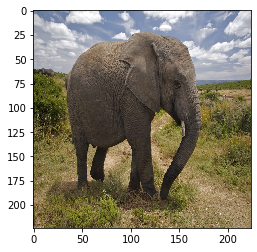

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


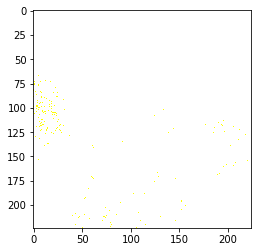

(1, 224, 224, 3)
Predicted: [('n02504458', 'African_elephant', 0.4135972), ('n01871265', 'tusker', 0.38481265), ('n02504013', 'Indian_elephant', 0.20153043)]


In [132]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

img_path = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/elephant.jpeg'

img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.show()
# print(img.shape)
x = image.img_to_array(img)

plt.imshow(x)
plt.show()

x = np.expand_dims(x, axis=0)

print(x.shape)

x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top = 3)[0] )



### Setting up the Grad-CAM algorithm

In [133]:
np.argmax(preds[0])
print(preds.shape)

(1, 1000)


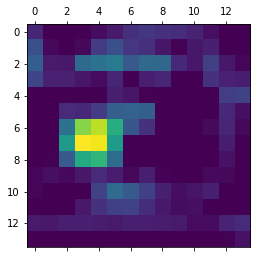

In [134]:
africa_ephant_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(africa_ephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)


heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(664, 1000, 3)

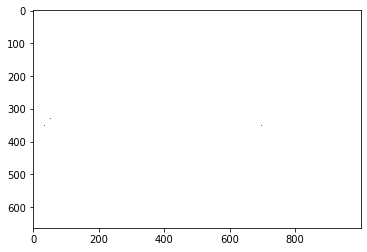

In [139]:
import cv2 
img = cv2.imread(img_path) 
heatmap = cv2.resize (heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET )

superimposed_img = heatmap * 0.4 + img 

plt.imshow(superimposed_img)

superimposed_img.shape
# cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)

### Inspecting and monitoring deep-learning models using Keras callbacks and TensorBoard

### Using callbacks to act on a model during training

Model checkpointing—Saving the current weights of the model at different points
during training.

+ Early stopping—Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
+ Dynamically adjusting the value of certain parameters during training—Such as the learning rate of the optimizer.
+ Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated—The Keras progress bar that you’re familiar with is a callback

In [ ]:
import keras 

callbacks_list = [ keras.callbacks.EarlyStopping ( # interrrupts training when improvement stops 
                    monitor = 'acc',            # Monitors the model's validation accuracy 
                    patience = 1),              # interrupts training when accuracy has stoppded improving for more than one epch 
                  
                    keras.callbacks.ModelCheckpoint(  # save the current weughts after evwry epoch
                    filepath = 'my_model.h5',     # path to the destination model file 
                    monitor = 'val_loss',
                    save_best_only = True,    # these two arguments mean you won't overwrite the model file unless val_loss has improved, 
                                # which allows you keep the best model seen during training
                    )]
model.compile (optimizer = 'rmsprop',
              loss = 'binary_crossentropy', 
               metrics = ['acc'])   # you monitor accuracy, so it should be part of the model's metrics

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy'
             metrics = ['acc'])
model.fit( x, y, 
         epochs = 10,                        # Note that because the callback will 
         batch_size = 32,                    # monitor validation loss and validation accuracy, 
         callbacks = callbacks_list,         # you need to pass validation_data the call to fit
         validation_Data = (x_val, y_val))




### THE REDUCELRONPLATEAU CALLBACK

In [ ]:
callback_list = [keras.callbacks.ReduceLROnPlateau(
                monitor = 'val_loss',   # Monitors the model's validation loss
                factor = 0.1,          # devides the learnng rate by 10 when triggered
                patience = 10 )]       # the callback is triggered after the validation loss has stopped improving for 10 epchos

model.fit(x, y, 
         epchs = 10, 
         batch_size = 32, 
         callback = callbacks_list, 
         validation_data = (x_val, y_val))


### Writing your own callback

In [ ]:
on_epoch_begin   #called at the start of every epoch 
on_epoch_end     # called at the end of every epoch 

on_batch_begin   # called right before processing each batch 
on_batch_end     # call right after processing each batch 

on_train_begin  # called at the start of training 
on_train_end    # called at the end of traning 

In [ ]:
import keras 
import numpy as np 

class ActivationLogger(keras.callbacks.Callback):
    def set_model(self, model):
        self.model = model
        layer_outputs = [layer.output for layer in model.layers]
        self.activations_model = keras.models.Model(model.input,
                            layer_outputs)
        
    def on_epoch_end (self, epoch, logs =None): 
        if self.validation_data is None: 
            raise RuntimeError('Requires validation_data. ')
    
    validation_sample = self.validation_data[0][0:1]
    activations = self.activations_model.predict(validation_sample)
    f = open('activations_at_epoch_' + str(epoch) + '.npz', 'w')
    np.savez(f, activations)
    f.close()

        
        
        
        

# Conclusions

### The universal machine-learning workflow

### Define the problem: What data is available, and what are you trying to predict? Will you need to collect more data or hire people to manually label a dataset?

### Identify a way to reliably measure success on your goal. For simple tasks, this may be prediction accuracy, but in many cases it will require sophisticated domain-specific metrics.
 
### Prepare the validation process that you’ll use to evaluate your models. In particular, you should define a training set, a validation set, and a test set. The validation- and test-set labels shouldn’t leak into the training data: for instance, with temporal prediction, the validation and test data should be posterior to the training data.

### Vectorize the data by turning it into vectors and preprocessing it in a way that makes it more easily approachable by a neural network (normalization, and so on).

### Develop a first model that beats a trivial common-sense baseline, thus demonstrating that machine learning can work on your problem. This may not always be the case!

### Gradually refine your model architecture by tuning hyperparameters and adding regularization. Make changes based on performance on the validation data only, not the test data or the training data. Remember that you should get your model to overfit (thus identifying a model capacity level that’s greater than you need) and only then begin to add regularization or downsize your model.

##   Key network architectures

+ Vector data—Densely connected network ( Dense layers).

+ Image data— 2D convnets.

+ Sound data (for example, waveform)—Either 1D convnets (preferred) or RNN s.

+ Text data—Either 1D convnets (preferred) or RNN s.

+ Timeseries data—Either RNN s (preferred) or 1D convnets.

+ Other types of sequence data—Either RNN s or 1D convnets. Prefer RNN s if data
ordering is strongly meaningful (for example, for timeseries, but not for text).

+ Video data—Either 3D convnets (if you need to capture motion effects) or a combination of a frame-level 2D convnet for feature extraction followed by either an RNN or a 1D convnet to process the resulting sequences.

+ Volumetric data— 3D convnets.

## Key concepts in review

### Mapping vector data to vector data


– Predictive healthcare—Mapping patient medical records to predictions of
patient outcomes

– Behavioral targeting—Mapping a set of website attributes with data on how
long a user will spend on the website

– Product quality control—Mapping a set of attributes relative to an instance of a
manufactured product with the probability that the product will fail by next
year
Mapping image data to vector data

– Doctor assistant—Mapping slides of medical images with a prediction about
the presence of a tumor

– Self-driving vehicle—Mapping car dash-cam video frames to steering wheel
angle commands

– Board game AI —Mapping Go and chess boards to the next player move

– Diet helper—Mapping pictures of a dish to its calorie count

– Age prediction—Mapping selfies to the age of the person
Mapping timeseries data to vector data

– Weather prediction—Mapping timeseries of weather data in a grid of locations
of weather data the following week at a specific location

– Brain-computer interfaces—Mapping timeseries of magnetoencephalogram
( MEG ) data to computer commands

– Behavioral targeting—Mapping timeseries of user interactions on a website to
the probability that a user will buy something
Mapping text to text

– Smart reply—Mapping emails to possible one-line replies

– Answering questions—Mapping general-knowledge questions to answers

– Summarization—Mapping a long article to a short summary of the article
Mapping images to text

– Captioning—Mapping images to short captions describing the contents of
the images
Mapping text to images

– Conditioned image generation—Mapping a short text description to images
matching the description

– Logo generation/selection—Mapping the name and description of a company
to the company’s logo
Mapping images to images

– Super-resolution—Mapping downsized images to higher-resolution versions of
the same images

– Visual depth sensing—Mapping images of indoor environments to maps of
depth predictions

Mapping images and text to text

– Visual QA —Mapping images and natural-language questions about the con-
tents of images to natural-language answers

+  Mapping video and text to text
– Video QA —Mapping short videos and natural-language questions about the
contents of videos to natural-language answers

### Staying up to date in a fast-moving field

As final parting words, I want to give you some pointers about how to keep learning
and updating your knowledge and skills after you’ve turned the last page of this book.
The field of modern deep learning, as we know it today, is only a few years old, despite
a long, slow prehistory stretching back decades. With an exponential increase in
financial resources and research headcount since 2013, the field as a whole is now
moving at a frenetic pace. What you’ve learned in this book won’t stay relevant for-
ever, and it isn’t all you’ll need for the rest of your career.
Fortunately, there are plenty of free online resources that you can use to stay up to
date and expand your horizons. Here are a few.

### Practice on real-world problems using Kaggle

One effective way to acquire real-world experience is to try your hand at machine-
learning competitions on Kaggle (https://kaggle.com). The only real way to learn is
through practice and actual coding—that’s the philosophy of this book, and Kaggle
competitions are the natural continuation of this. On Kaggle, you’ll find an array of
constantly renewed data-science competitions, many of which involve deep learning,
prepared by companies interested in obtaining novel solutions to some of their most
challenging machine-learning problems. Fairly large monetary prizes are offered to
top entrants.
Most competitions are won using either the XGBoost library (for shallow machine
learning) or Keras (for deep learning). So you’ll fit right in! By participating in a few
competitions, maybe as part of a team, you’ll become more familiar with the practical
side of some of the advanced best practices described in this book, especially hyperpa-
rameter tuning, avoiding validation-set overfitting, and model ensembling.


### Read about the latest developments on arXiv

Deep-learning research, in contrast with some other scientific fields, takes places com-
pletely in the open. Papers are made publicly and freely accessible as soon as they’re
finalized, and a lot of related software is open source. arXiv (https://arxiv.org)—pro-
nounced “archive” (the X stands for the Greek chi)—is an open-access preprint server
for physics, mathematics, and computer science research papers. It has become the
de facto way to stay up to date on the bleeding edge of machine learning and deep
learning. The large majority of deep-learning researchers upload any paper they write
to arXiv shortly after completion. This allows them to plant a flag and claim a specific
finding without waiting for a conference acceptance (which takes months), which is
necessary given the fast pace of research and the intense competition in the field. It
also allows the field to move extremely fast: all new findings are immediately available
for all to see and to build on.
An important downside is that the sheer quantity of new papers posted every day
on arXiv makes it impossible to even skim them all; and the fact that they aren’t peer
reviewed makes it difficult to identify those that are both important and high quality.
Licensed to <null>338
C HAPTER 9
Conclusions
It’s difficult, and becoming increasingly more so, to find the signal in the noise. Cur-
rently, there isn’t a good solution to this problem. But some tools can help: an auxil-
iary website called arXiv Sanity Preserver (http://arxiv-sanity.com) serves as a
recommendation engine for new papers and can help you keep track of new develop-
ments within a specific narrow vertical of deep learning. Additionally, you can use
Google Scholar (https://scholar.google.com) to keep track of publications by your
favorite authors.


### Explore the Keras ecosystem

With about 200,000 users as of November 2017 and growing fast, Keras has a large
ecosystem of tutorials, guides, and related open source projects:
 Your main reference for working with Keras is the online documentation at
https://keras.io. The Keras source code can be found at https://github.com/
fchollet/keras.
 You can ask for help and join deep-learning discussions on the Keras Slack
channel: https://kerasteam.slack.com.
 The Keras blog, https://blog.keras.io, offers Keras tutorials and other articles
related to deep learning.
 You can follow me on Twitter: @fchollet.

### Final words
This is the end of Deep Learning with Python! I hope you’ve learned a thing or two about
machine learning, deep learning, Keras, and maybe even cognition in general. Learn-
ing is a lifelong journey, especially in the field of AI , where we have far more unknowns
on our hands than certitudes. So please go on learning, questioning, and researching.
Never stop. Because even given the progress made so far, most of the fundamental
questions in AI remain unanswered. Many haven’t even been properly asked yet.